In [ ]:
# AVANCE 1
# Carga y transformación de los datos 
#1 Lee el archivo Readme.txt y analiza las columnas y datos que se van a utilizar 
# para obtener un mayor conocimiento del dataset.

#2 Crea un nuevo notebook llamado “PIDA_M4_Nombre_Apellido.ipynb” 
# (Reemplaza Nombre y Apellido por tus datos).

In [1]:
# importa las librerías que necesitarás para realizar el 1° avance del PI.
import numpy as np
import pandas as pd

In [2]:
# Lee el archivo data_latinoamerica.csv con código Python en tu Visual Studio Code

data = pd.read_csv ('C:/Users/silvina/Documents/data_latinoamerica.csv', sep=',')

In [3]:
#4 Comprueba que eldas  dataset cargado tiene la cantidad de registros y columnas especifica
# Este nuevo archivo, en formato CSV, cuenta con 12,216,057 filas y 50 columnas
# (Recuerda que hay una función para ello)

np.shape(data)

(12216057, 50)

In [4]:
# otra forma, como atributo del objeto data (Comprueba tamaño Dataset cantidad de registros y columnas)

data.shape

(12216057, 50)

In [5]:
# ver encabezados del Dataset
data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [6]:
# ETL primeros filtros para que quede el archivo que necesito para el análisis del proyecto
#5 Selecciona los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brazil.

paises_seleccionados = ['Colombia','Argentina','Chile','Mexico','Peru','Brazil']
data_latinoamerica = data[data['country_name'].isin(paises_seleccionados)]


In [7]:
#Verifica nuevo tamaño del Dataset luego de filtrar los países requeridos para el análisis
np.shape(data_latinoamerica)

(11970289, 50)

In [8]:
# Verificar datos faltantes por columna
data_latinoamerica.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [9]:
# Columnas con faltantes mayores a 4millones (para luego eliminarlas)
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [10]:
# filtrar por location Key ya que esa columna no tiene faltanes (cero faltantes)
data_latinoamerica_paises = data_latinoamerica[data_latinoamerica['location_key'].isin(['AR','CL','CO','MX','PE','BR'])]

In [11]:
np.shape(data_latinoamerica_paises)

(5946, 50)

In [12]:
#6 Filtra los datos en fechas mayores a 2021-01-01.
data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises['date']>'2021-01-01']

In [13]:
np.shape(data_latinoamerica_paises_Fecha)

(3744, 50)

In [14]:
#7 Compara a nivel de país para llenar valores faltantes.

# Contar valores nulos (ver columnas con valores nulos dentro de los países y fechas seleccionadas)
valores_nulos_fecha = data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print (valores_nulos_fecha)
print (np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [15]:
#8 Realiza una limpieza preliminar de los datos, eliminando registros nulos y 
# corrigiendo los tipos de datos donde sea necesario, trata con valores medios, 
# valores anteriores o valores siguientes.

#se usa un for para completar pais por pais, los valores nulos de las columnas que se mostraron en el paso anterior
# los valores nulos los reemplaza con el promedio  de cada pais de los países seleccionados
for pais in paises_seleccionados: 
    data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed'] = data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased'] = data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_Fecha['rainfall_mm'] = data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity'] = data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius'] = data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'].mean())


C:\Users\silvina\AppData\Local\Temp\ipykernel_3140\2994398589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\silvina\AppData\Local\Temp\ipykernel_3140\2994398589.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamer

In [16]:
#llenar Nan con valor de 0 en la columna new_recovered,cumulative_recovered,cumulative_vaccine_doses_administered 
data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)


C:\Users\silvina\AppData\Local\Temp\ipykernel_3140\2801899551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
C:\Users\silvina\AppData\Local\Temp\ipykernel_3140\2801899551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
C:\Users\silvina\AppData\Local\Temp\ipykernel_3140

In [17]:
#chequear que ya no nay columnas con datos nulos
data_latinoamerica_paises_Fecha.isnull().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [18]:
#verificar nuevamente que no hay nulos y el tamaño del dataset después de las transformaciones
print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_Fecha))


Series([], dtype: int64)
(3744, 50)


In [20]:
#guardar el nuevo Dataset filtrado en archivo csv para poder utilizarlo ya con la limpieza realizada para posteriores análisis con un 
#archivo más pequeño (poner el index False no lleva la columna de index para poder replicarlo luego )
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv",index=False)


In [3]:
#una vez realizado éste archivo se puede reiniciar el notebook para liberar memoria
# cargar el archivo filtrado (DatosFinalesFiltrado) y continuar análisis
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv",sep=',')
data_latinoamerica_paises.head()


location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [ ]:
#9 Examina las características básicas del dataset para comprender la distribución de las variables 
# clave como incidencia de COVID-19 e identifica las variables que consideras que son claves para tu análisis.



#11 Aplica bucles for y/o while para el cálculo de estadísticas descriptivas y otras métricas importantes 
# que ofrece pandas por default. Luego responde: ¿Qué implican estas métricas y cómo pueden ayudar en el 
# análisis de datos? ¿Se muestran todas las estadísticas en todas las columnas durante el análisis? ¿Cuál es la 
# razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?

#12 Crea una función que permita obtener la mediana, varianza y el rango. 
# Te dejamos algunas preguntas para analizar esas medidas: ¿Qué representa la mediana? 
# ¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango? 
# ¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?

In [1]:
#AVANCE 2 
# Análisis Exploratorio – Visualización

# Importar las librerías que necesarias para el avance.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# se apagan los warnings para que no salgan durante el análisis
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargar el Dataset obtenido en el Avance 1
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [4]:
# cargo la información del Dataset 
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [5]:
#3.	Análisis Estadístico con Pandas y Numpy: propiedades estadísticas del Dataset. 
# Calcula medidas de tendencia central, dispersión ycorrelaciones entre las variables 
# para entender mejor la situación actual y las necesidades de las áreas en estudio.

#Con un ciclo for para recorrer las columnas y obtener la media, mediana, desviación estándar, mínimo y máximo 
#de cada columna

for i in data_latinoamerica_paises.columns:
    print(i) 
    print(data_latinoamerica_paises[i].describe())
    print('---------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
---------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------
new_confirmed
count      3744.000000
mean      13899.659376
std       24210.340842
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------
new_deceased
count     3744.000000
mean       276.647712
std        507.067671
min          0.000000
25%         26.000000
50%        101.00

In [6]:
# recordar la lista de los paisese seleccinados para el análisis
paises_seleccionados=['Argentina','Chile','Colombia','Mexico','Peru','Brazil']

In [7]:
# recordar los encabezados del Dataset
data_latinoamerica_paises.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [8]:
# Ponemos como índice la columna "Date" para poder hacer un análisis de los datos a lo largo del tiempo (lo hace simple)
# inplace True se modifica asimismo
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)
data_latinoamerica_paises.head()

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

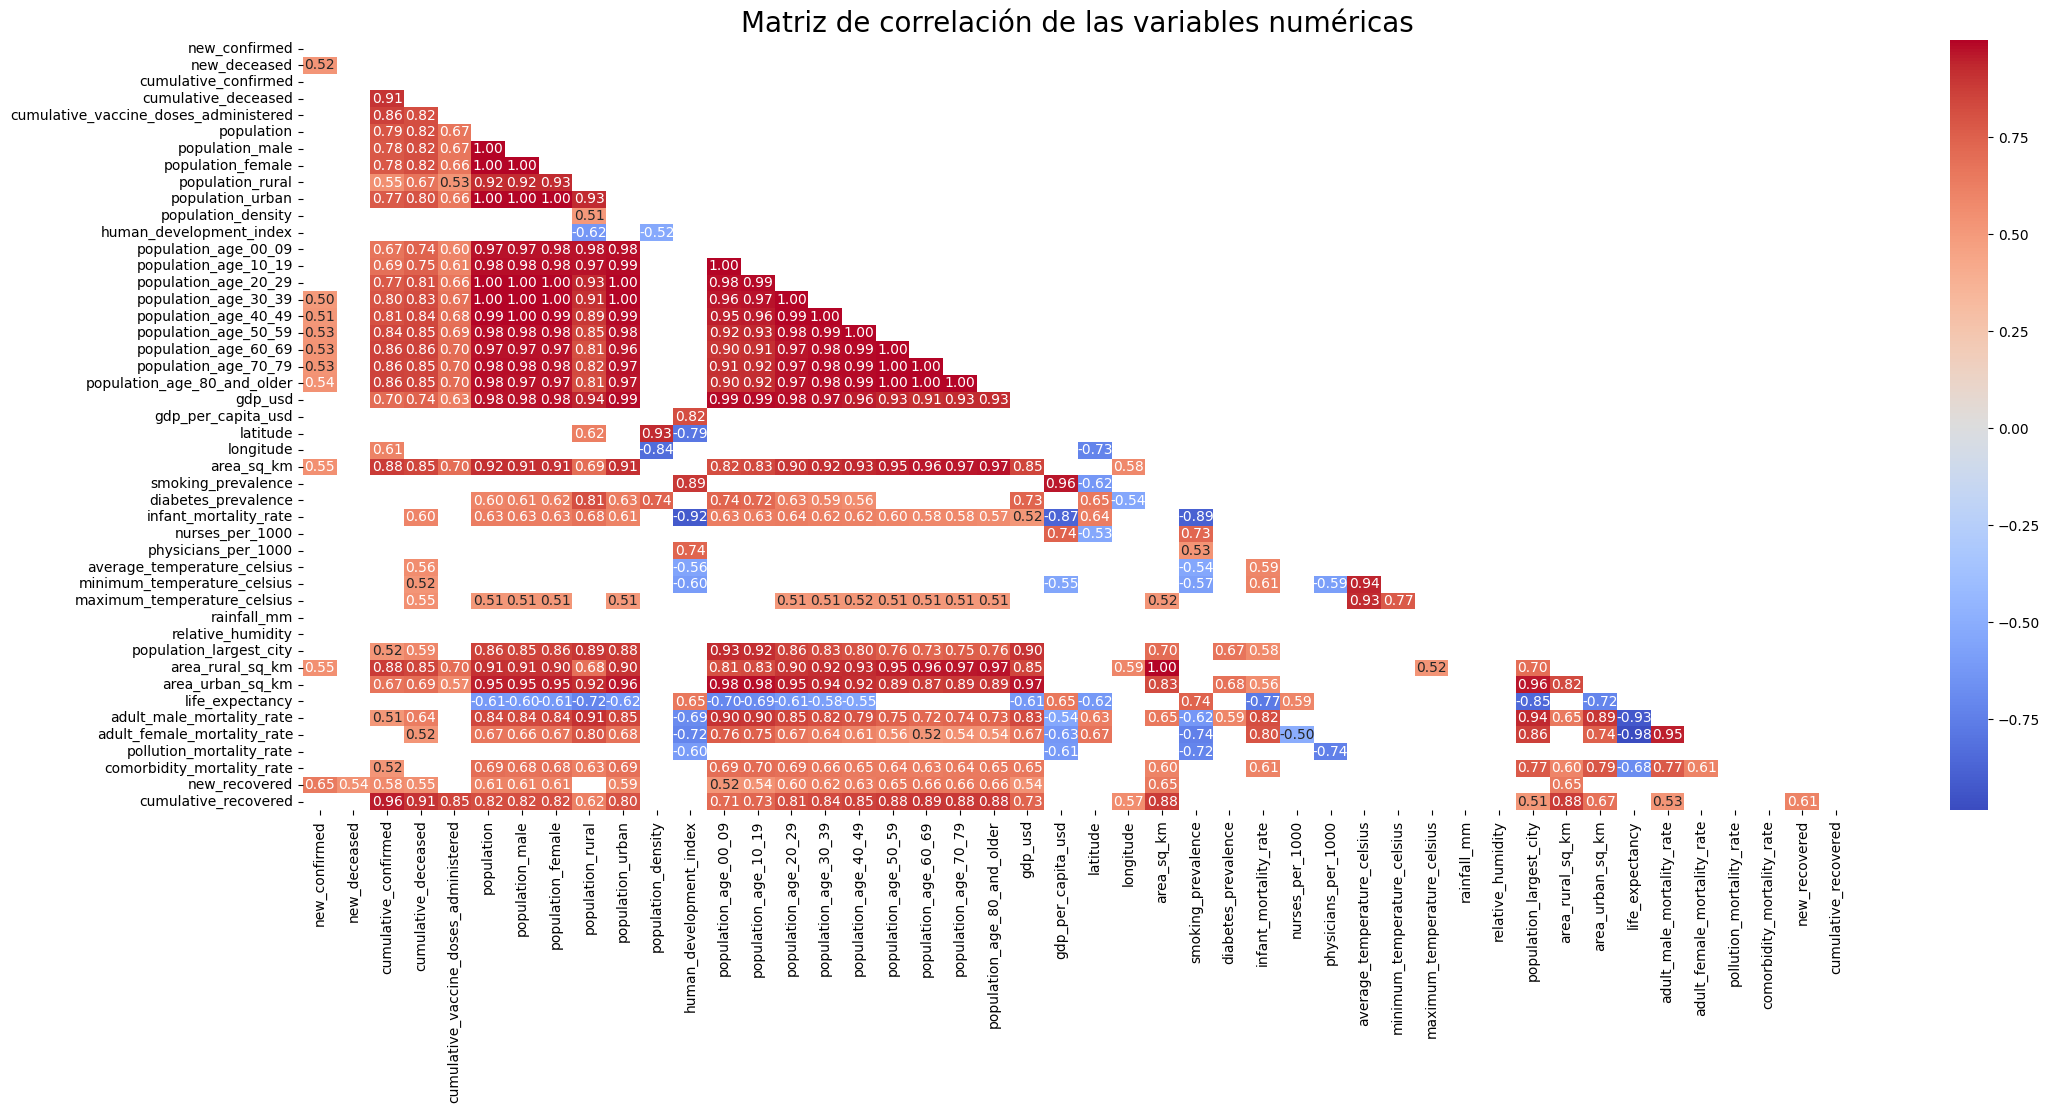

In [10]:
#Se crea la matriz de correlación de las variables numéricas para verificar alguna correlación que permita análisis
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()

#Aquí se crea máscara para el triángulo superior (opcional)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 (donde hay una correlación fuerte) OPCIONAL
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]

# Se crea la gráfica
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

El gráfico anterior muestra las variables con mayor correlación, para identificarlas más rápido, se definió un umbral cuyo valor absoluto sea mayor a 0.5 y se graficaron en un heatmap, teniendo una idea de las variables que tienen mayor correlación se podría hacer un análisis más detallado de dichas variables.

Previamente se realiza una revisión gráfica de la gran mayoría de las columnas para ver como se comportan los datos, para esta primera aproximación vamos a utilizar barplots utilizando un ciclo for y la librería seaborn.

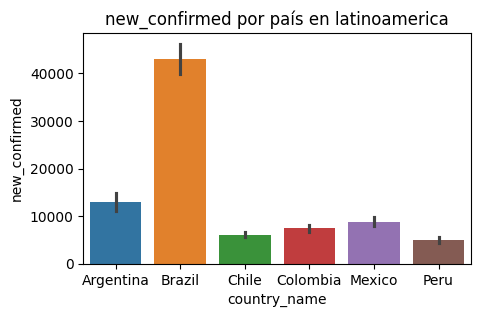

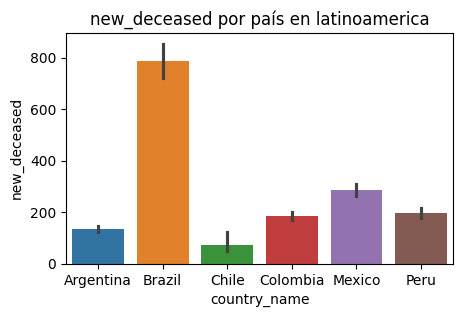

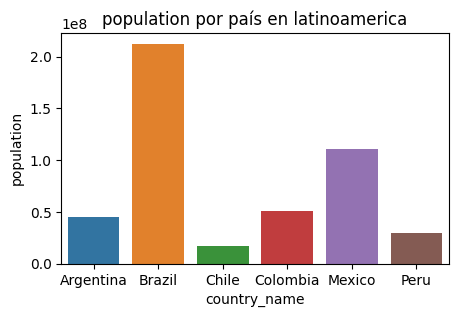

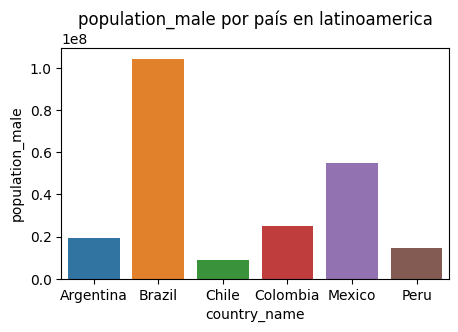

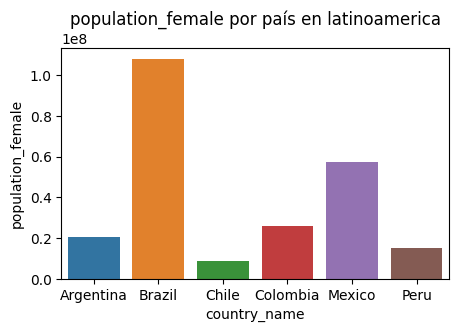

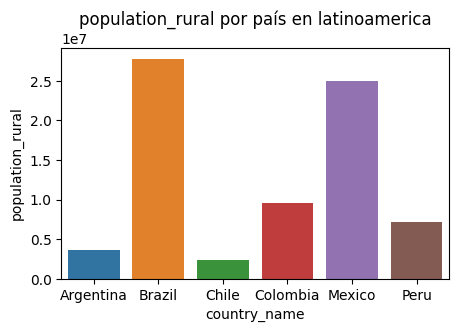

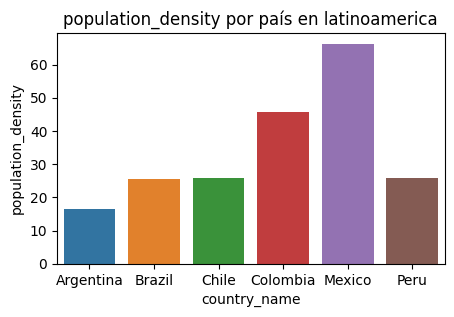

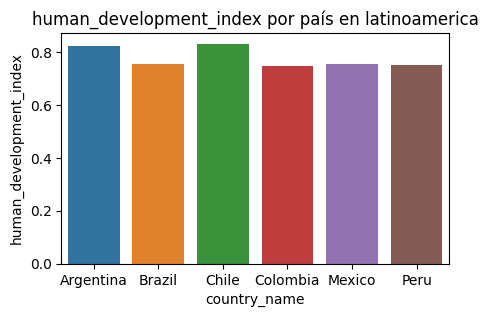

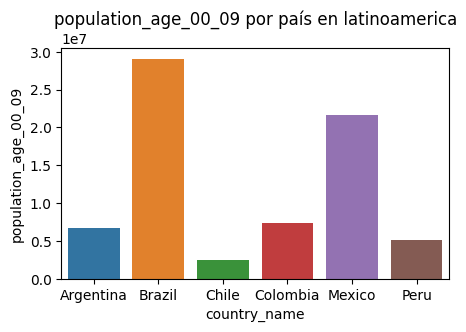

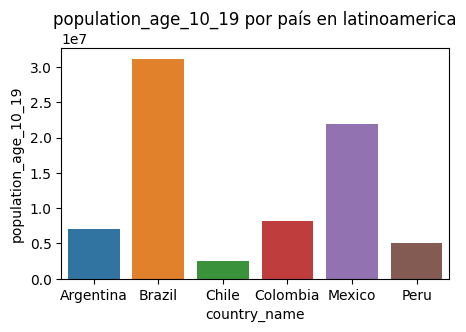

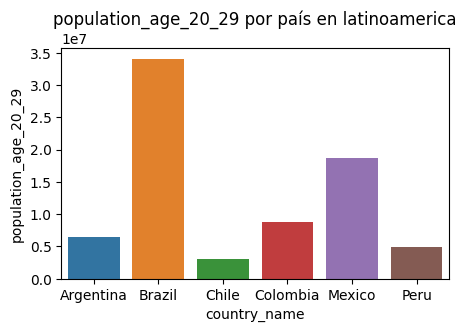

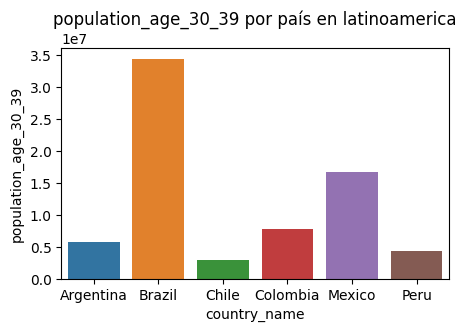

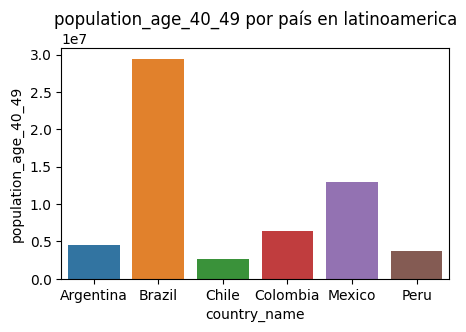

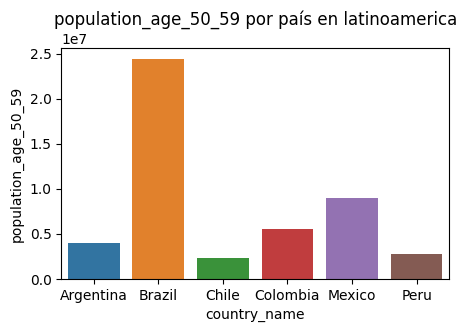

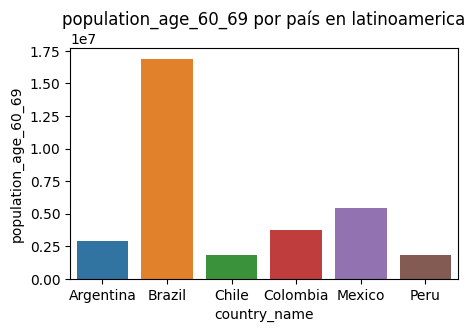

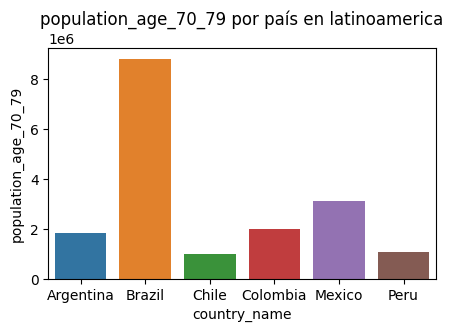

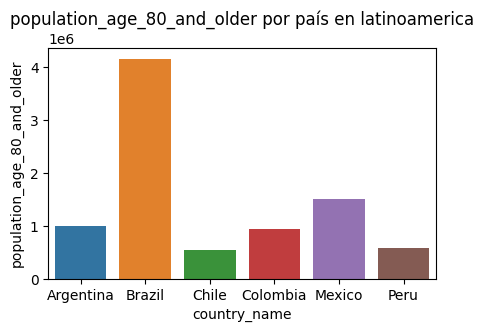

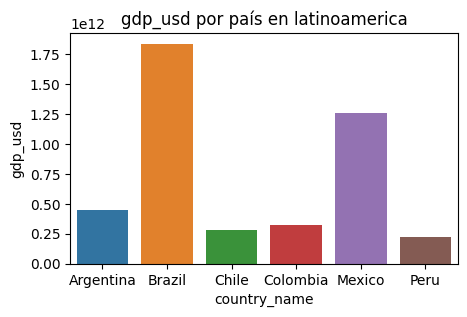

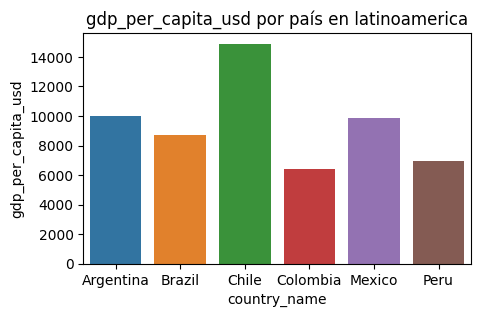

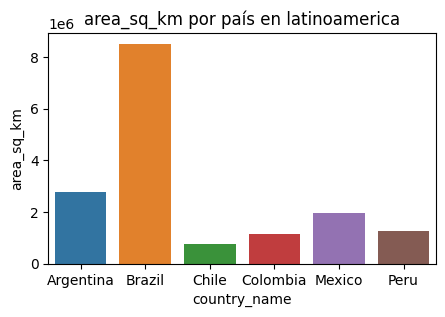

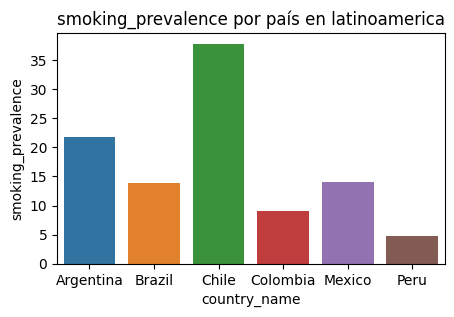

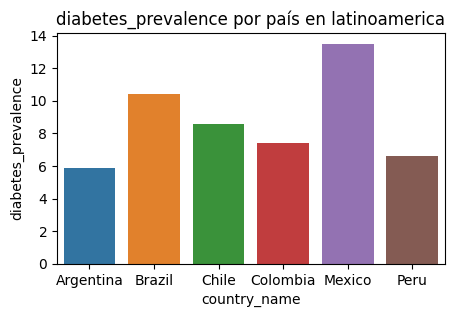

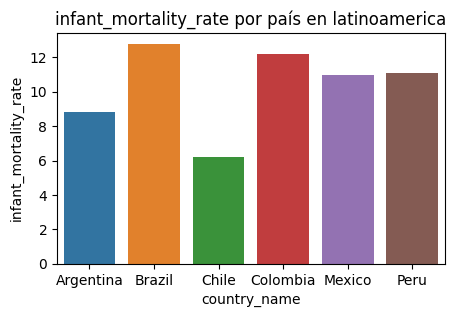

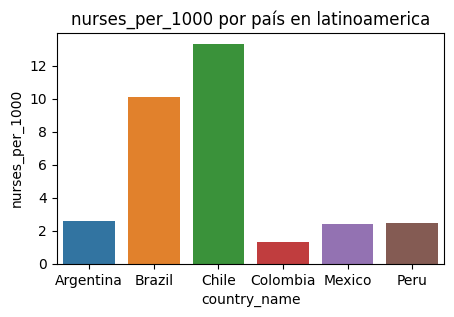

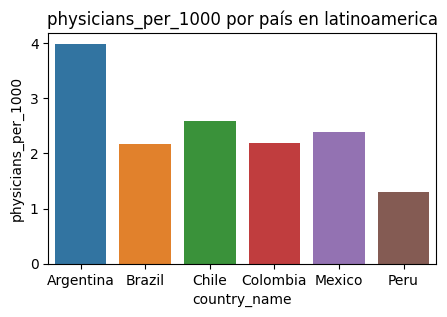

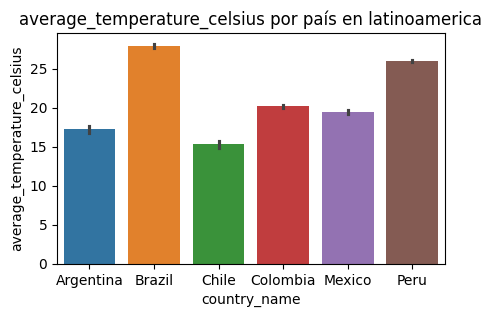

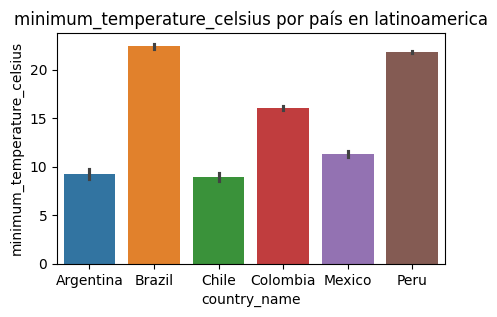

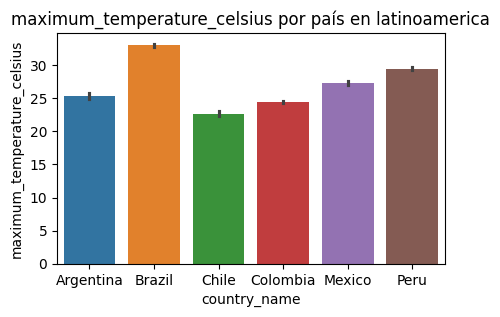

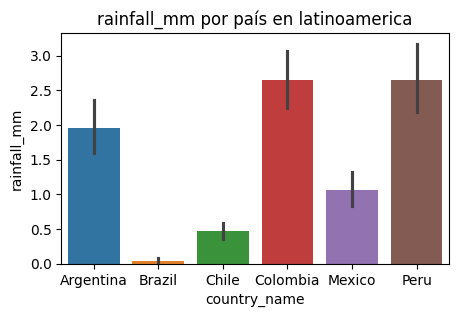

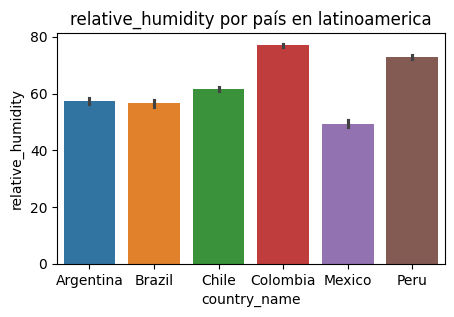

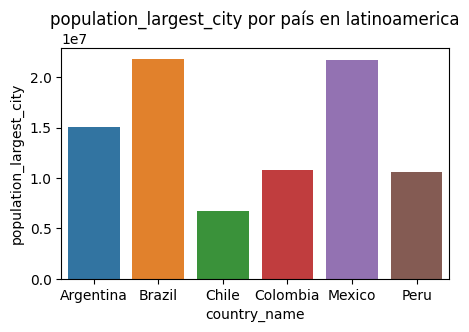

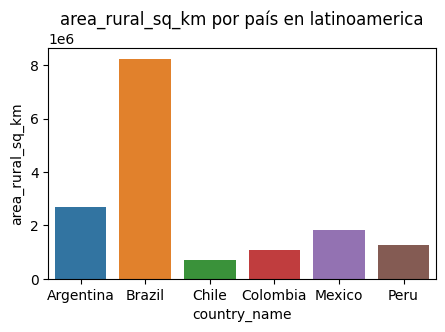

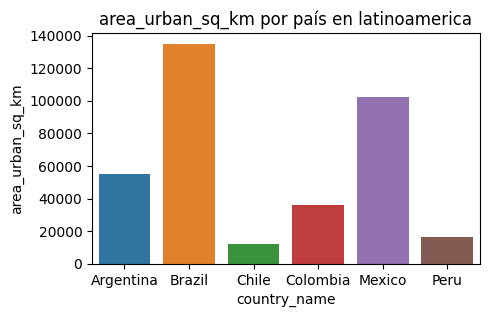

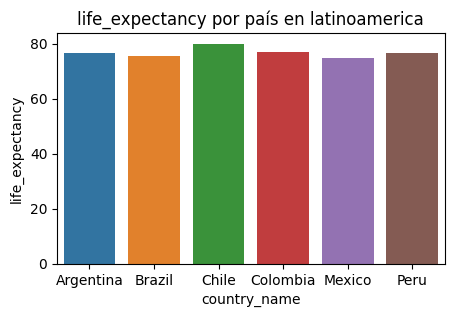

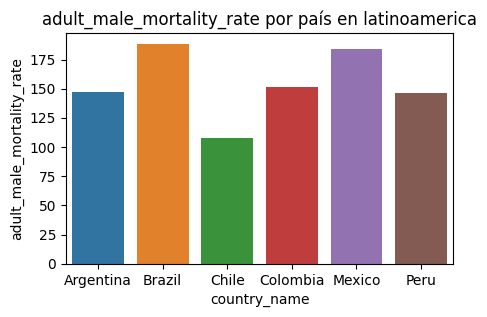

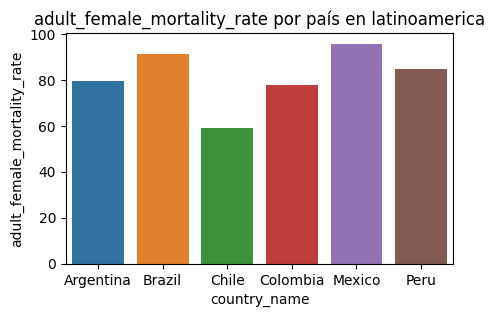

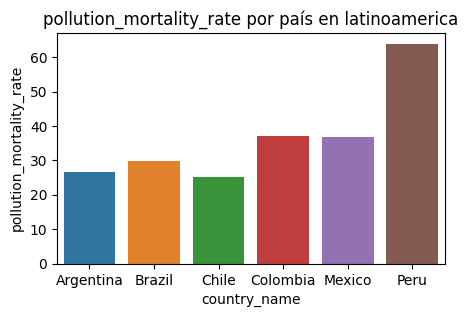

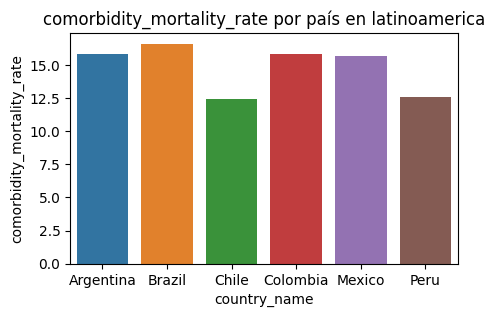

In [11]:
# para cada país en data_latinoamerica_paises con 6 columnas 
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed', 'cumulative_deceased',
       'cumulative_recovered', 'cumulative_vaccine_doses_administered','new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()


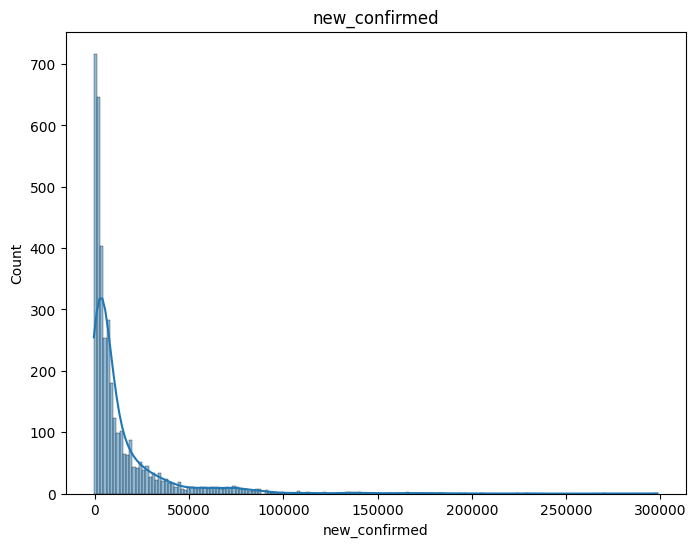

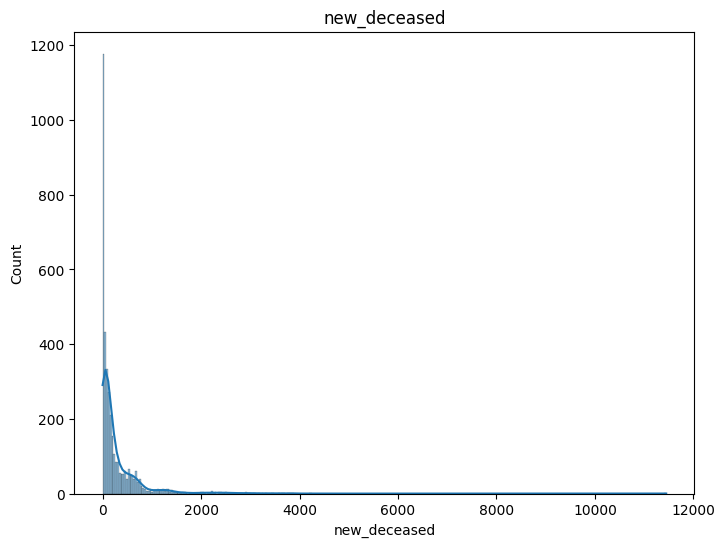

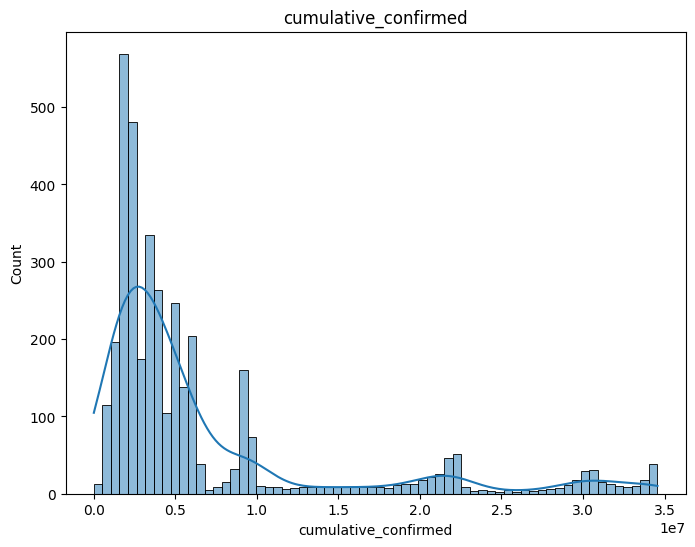

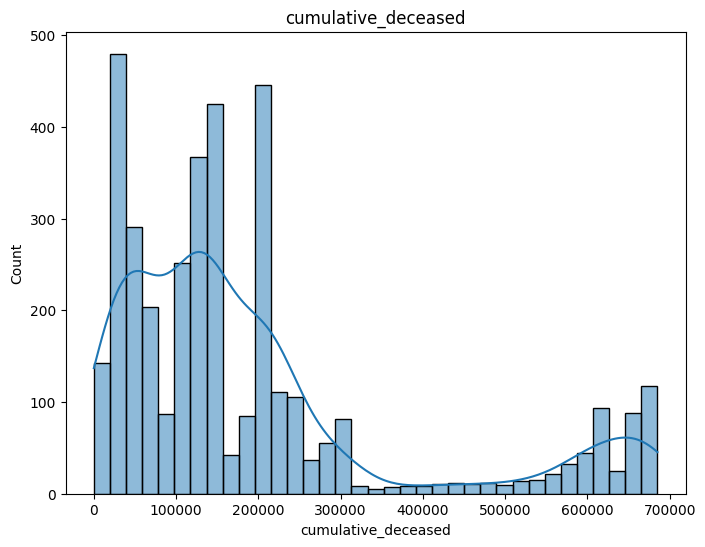

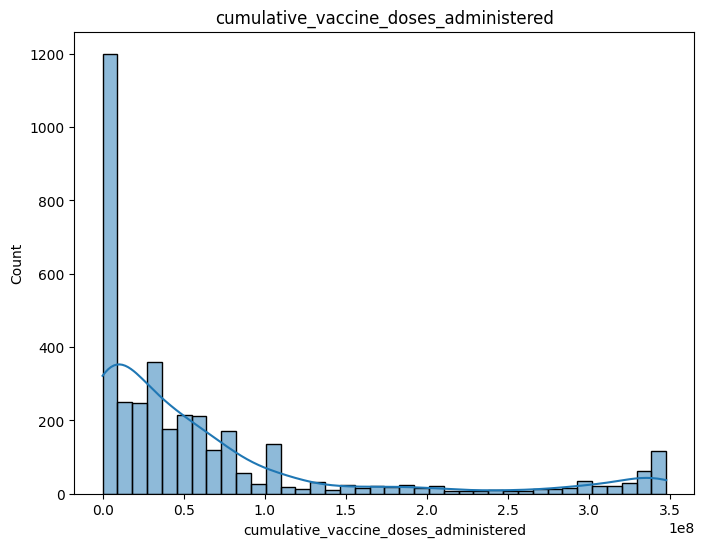

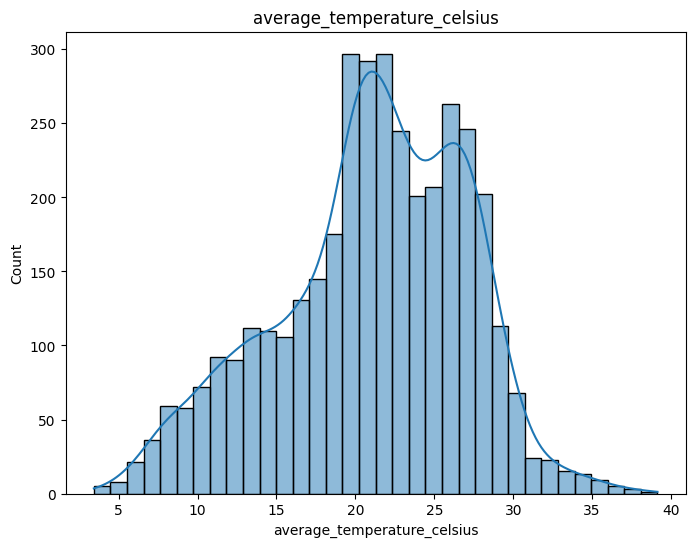

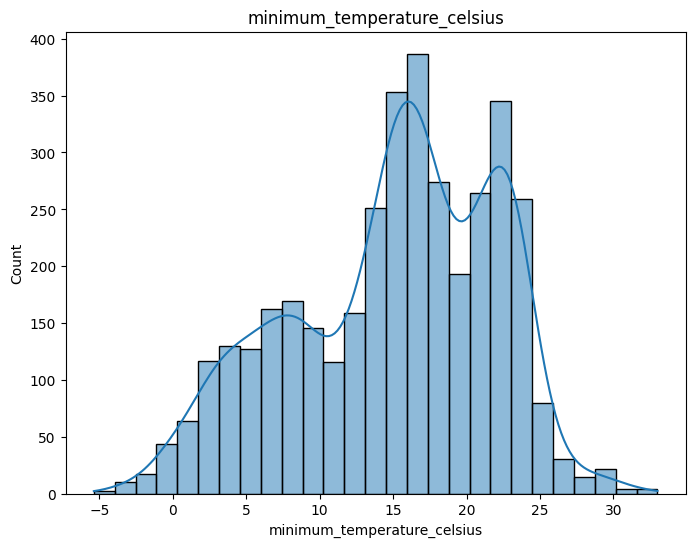

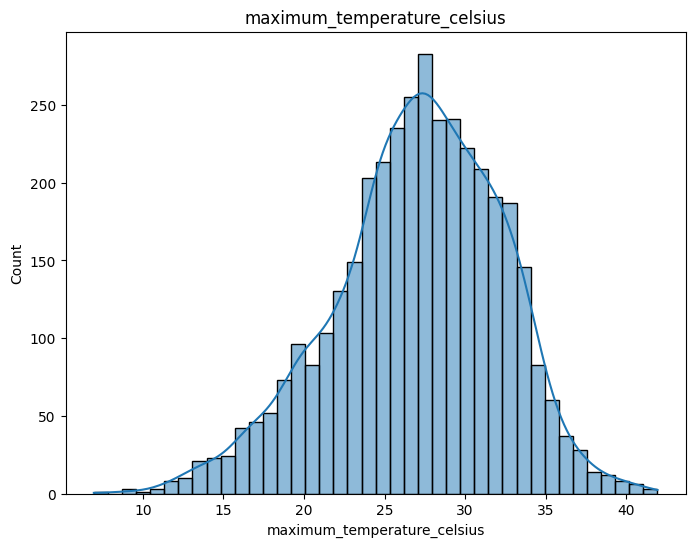

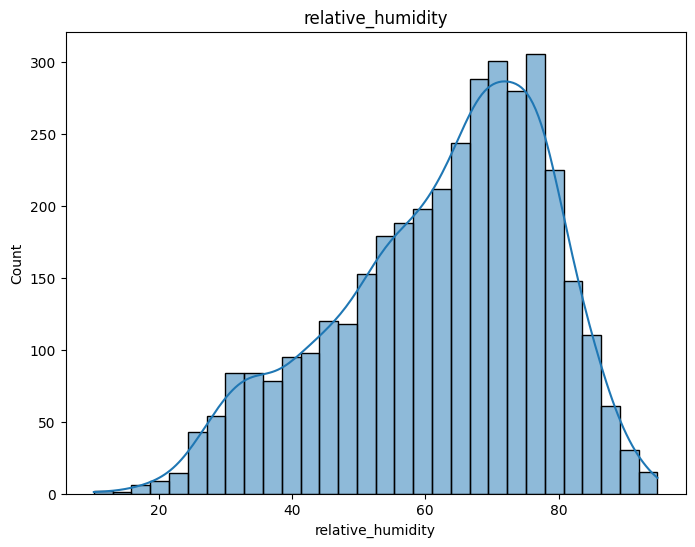

In [12]:
# mismo análisis anterior pero con Histrogramas para ver la distribución de los datos
# hago lista con las columnas que interesan
lista_columnas_6=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                  "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                  "maximum_temperature_celsius","relative_humidity"]

# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(data_latinoamerica_paises[i], kde=True)
    plt.title(i)
    plt.show()

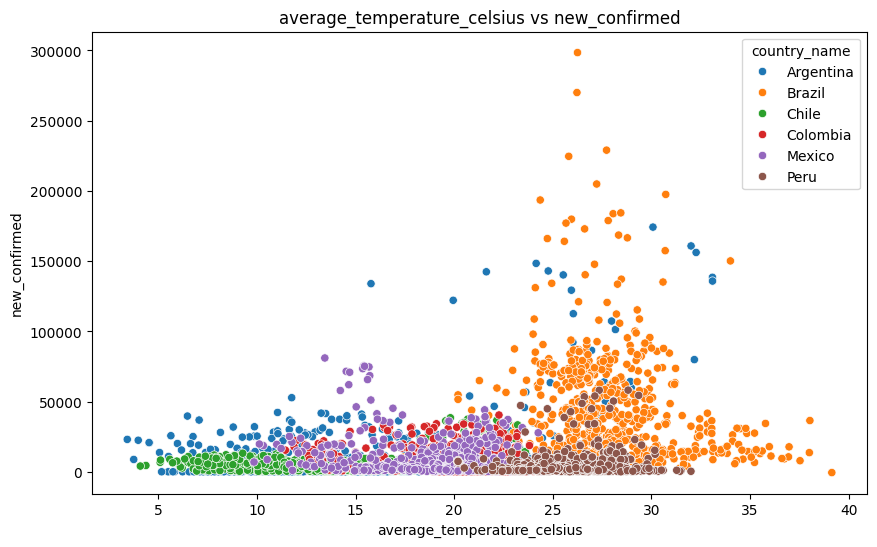

In [13]:
#Analisis enfocados en algunas variables específicas (variable average_temperature y la variable new_confirmed) 
# con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

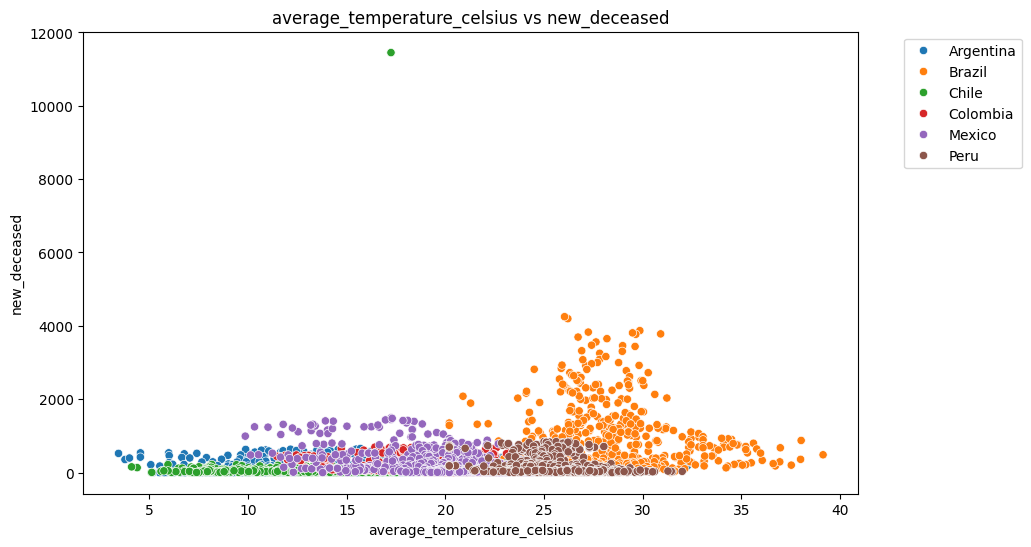

In [14]:
# Se ha podido observar que en algunos paises la temperatura no influye en la cantidad de casos confirmados, sin embargo
# en otros paises si se puede observar una relación entre la temperatura (Argentina) y la cantidad de casos confirmados.
# Si tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio 
# con la cantidad de muertes.

# Grafica de average_temperature_celsius vs new_deceased
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data_latinoamerica_paises, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

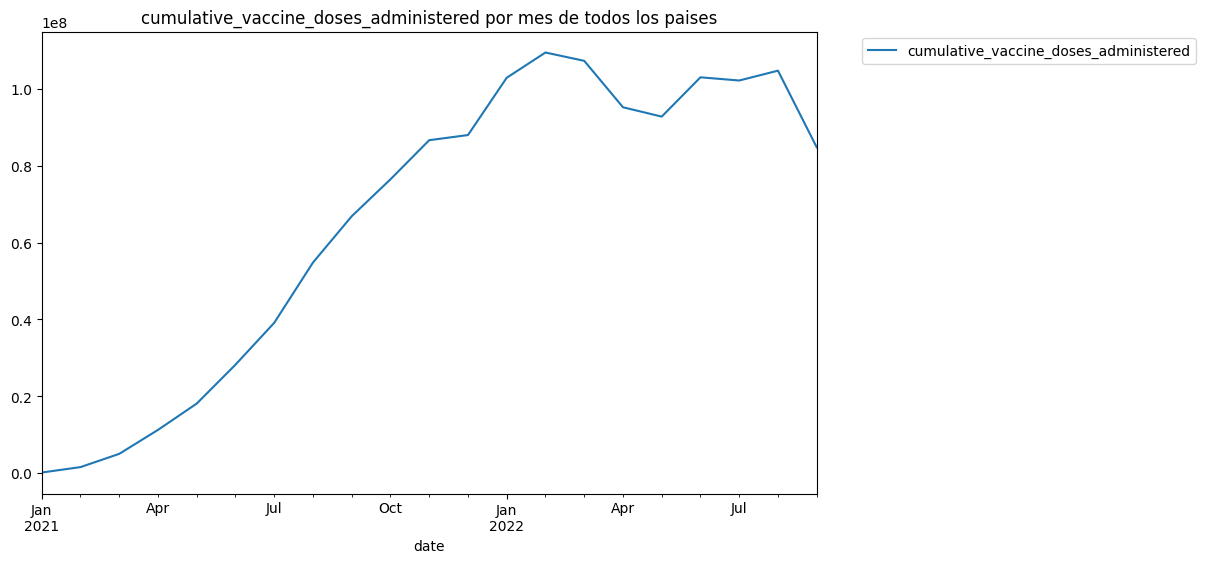

In [16]:
# En la grafica anterior se ve un comportamiento similar al de los casos confirmados, en algunos paises la temperatura 
# no influye en la cantidad de muertes, sin embargo en otros paises si se puede observar una relación entre la temperatura 
# y la cantidad de muertes.
# veamos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo 
# (observaremos las dosis administradas por mes en todos los países)

#Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()


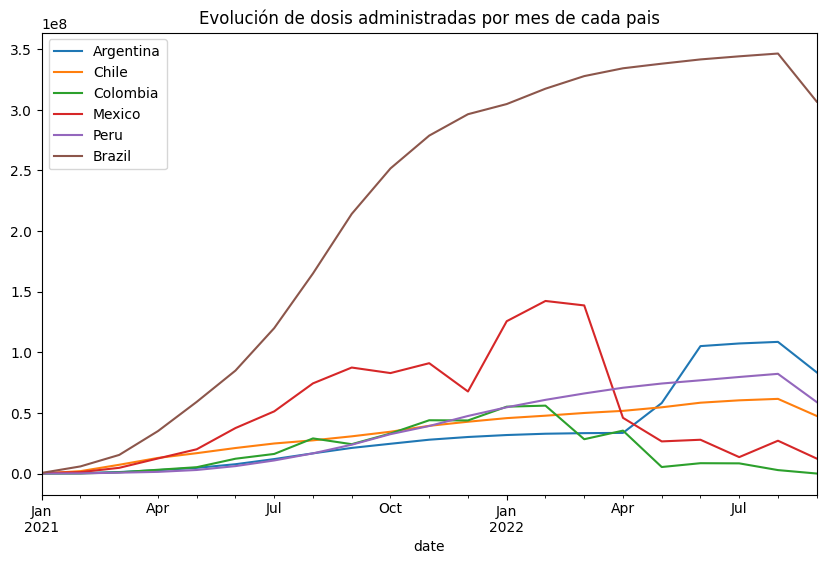

In [17]:
# En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países de Argentina, Brasil, 
# Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo, recordemos que es un análisis general y 
# no se ha hecho un análisis detallado. Como la anterior gráfica no nos da mucha información, vamos a realizar 
# un análisis más detallado de las dosis administradas por mes en cada país.

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

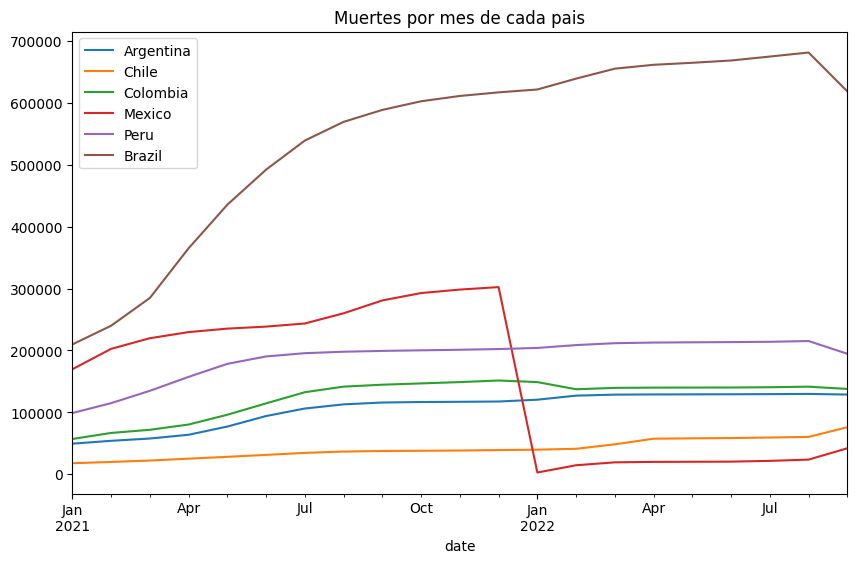

In [18]:
# con un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos paises 
# la cantidad de dosis administradas ha ido aumentando a lo largo del tiempo, sin embargo en otros paises la cantidad 
# de dosis administradas ha ido disminuyendo, Esto puede ser debido a muchos factores, como la cantidad de 
# vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.
# 
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

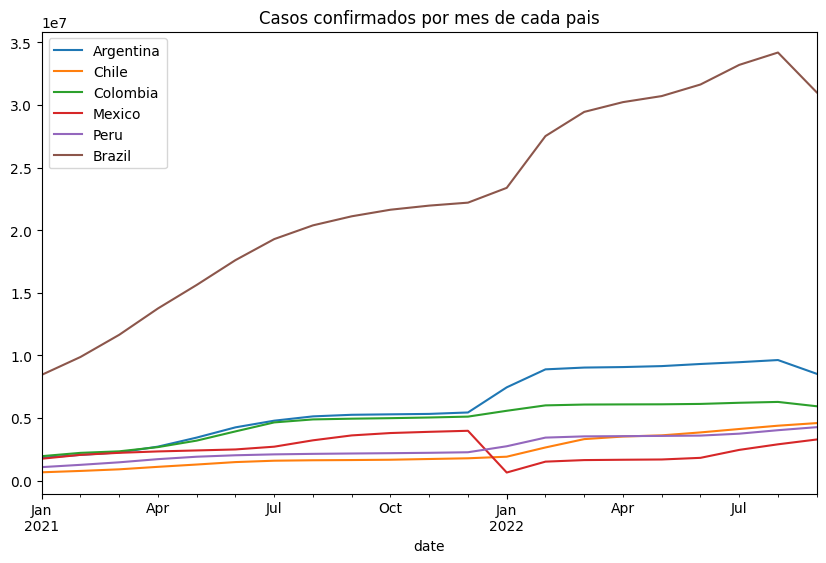

In [19]:
# El país que mas muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. 
# Sin embargo, esto no quiere decir que estos paises sean los que peor han manejado la pandemia, ya que hay que tener
# en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos. La disminución 
# de casos en méxico puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio 
# posterior.
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

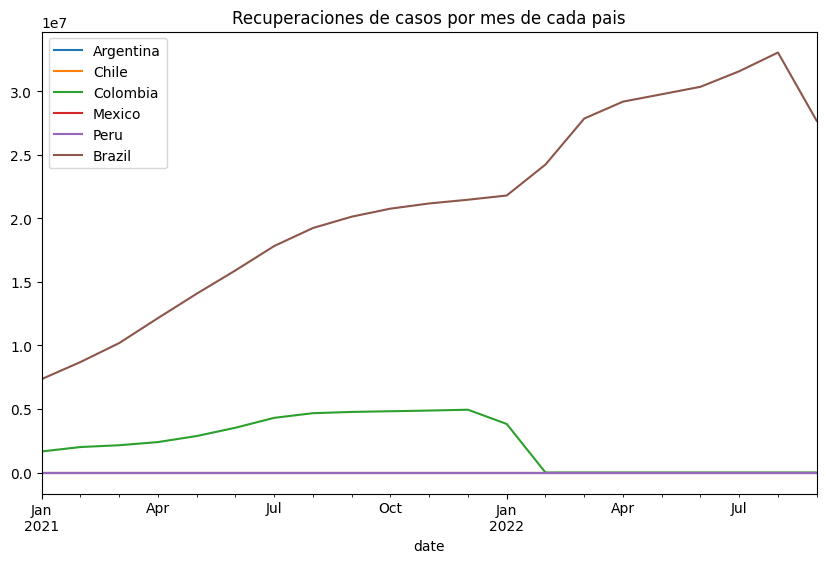

In [20]:
# El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. 
# Esto no quiere decir que manejaran peor la pandemia, ya que hay que tener en cuenta la cantidad de habitantes de 
# cada país además de otros factores y cantidad de datos que tenemos.

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

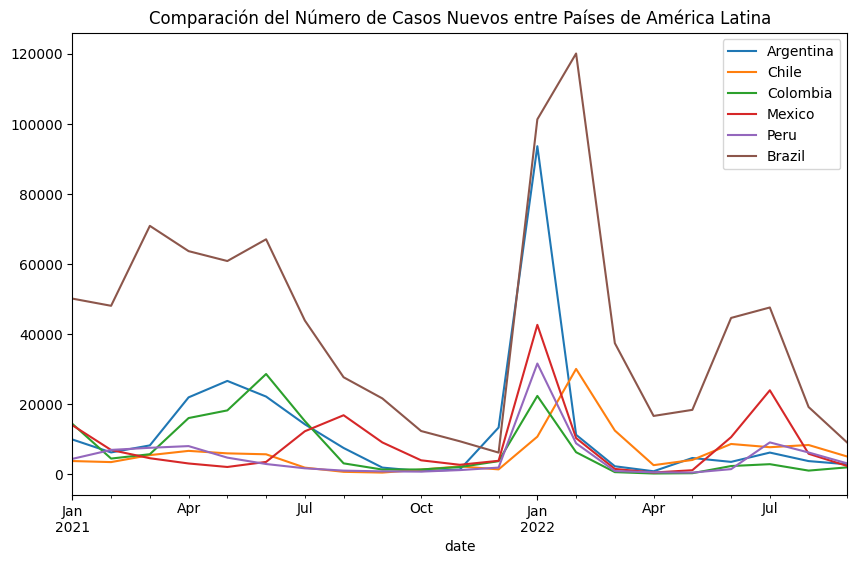

In [21]:
# El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad 
# de personas y vacunas disponibles.

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

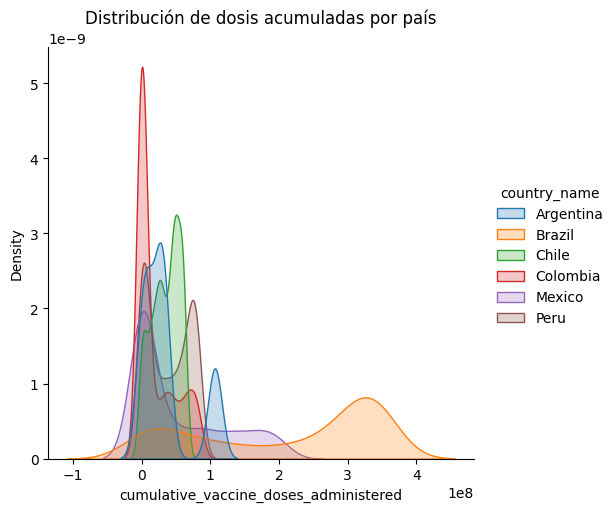

In [22]:
# De los paises que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, 
# se puede observar que la cantidad de muertes y casos confirmados es menor en estos paises 
# ademas de no ser tan desproporcionada la cantidad de vacunas administradas.

sns.displot(data_latinoamerica_paises, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

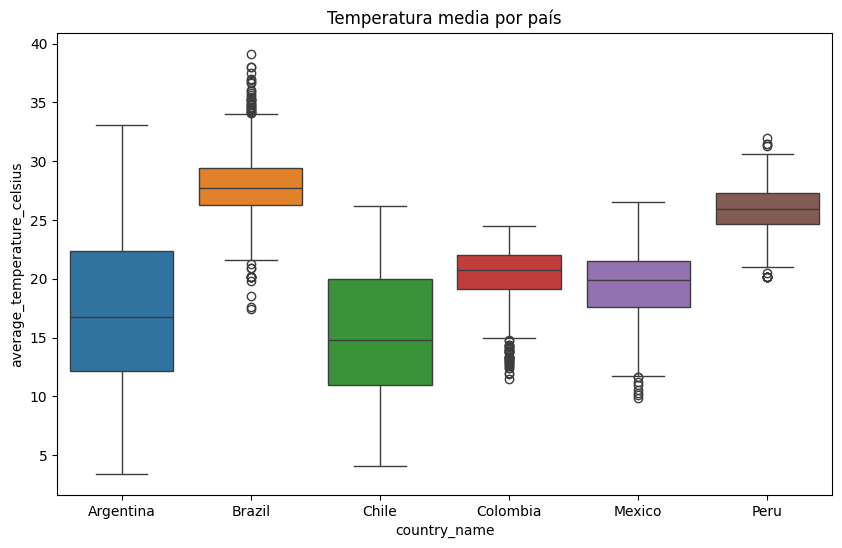

In [23]:
#average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_latinoamerica_paises, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

In [ ]:
# Aunque chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados 
# y muertes, se puede observar que chile ha manejado mejor la pandemia que los demás paises. Esto poco a poco nos 
# ha llevado a concluir que los paises donde se podría crear los nuevos centros serían donde hay mas casos confirmados 
# y muertes, ya que es donde se necesita más ayuda. Pese a nuestro anterior análisis, no podemos tomar una decisión 
# definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda hacer un 
# análisis más detallado y un estudio de los datos para poder tomar una decisión más acertada. 
# Seguiremos viendo como se comportan las variables de a traves de violinplots.


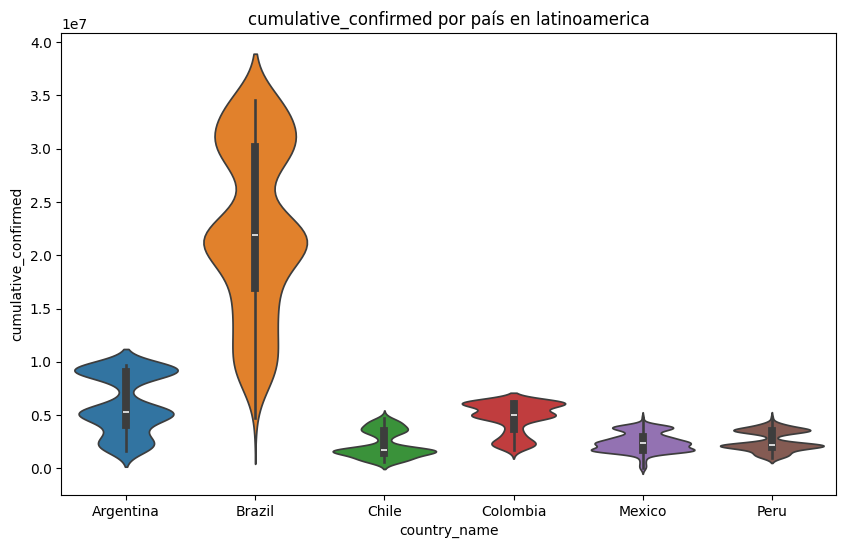

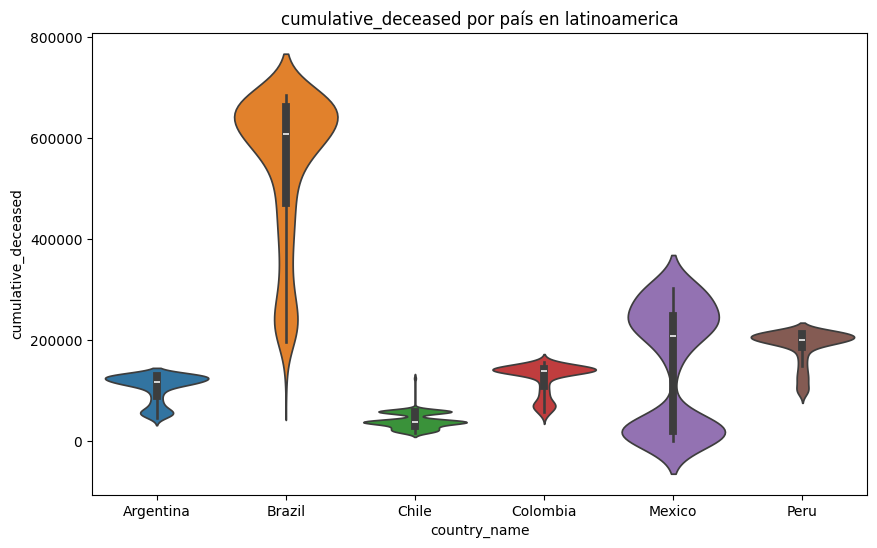

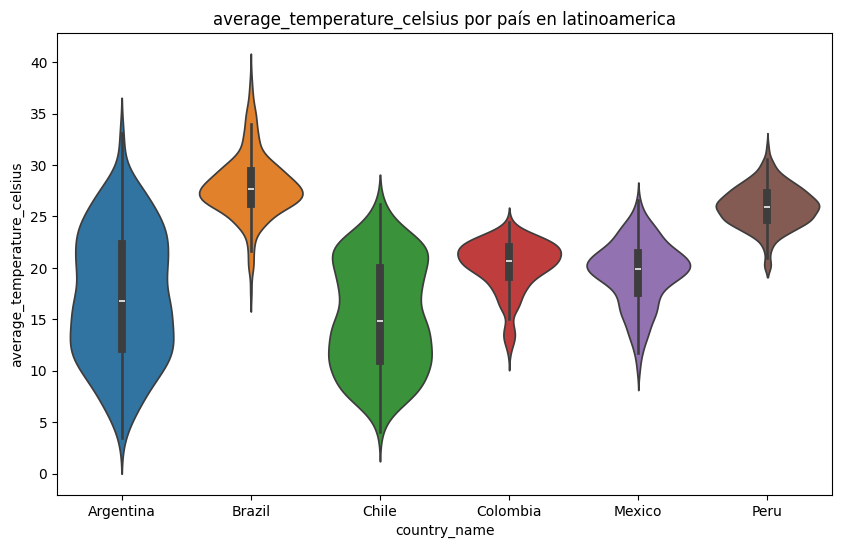

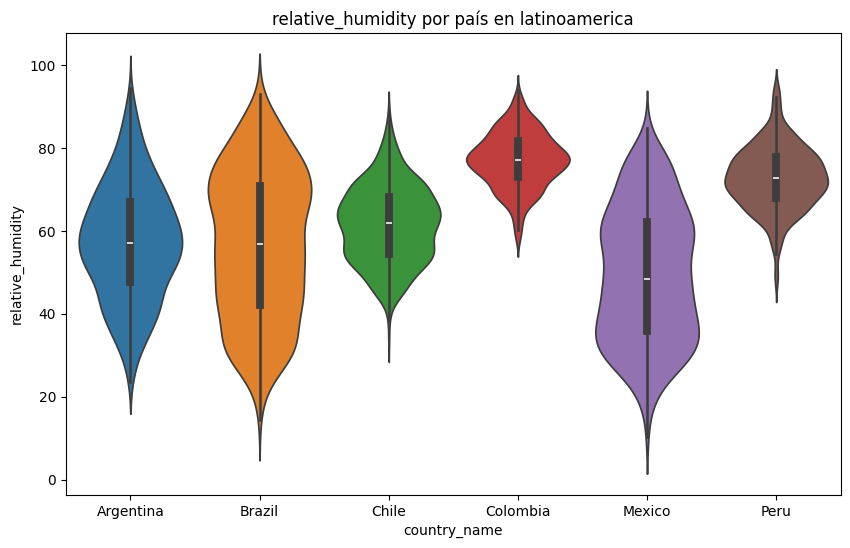

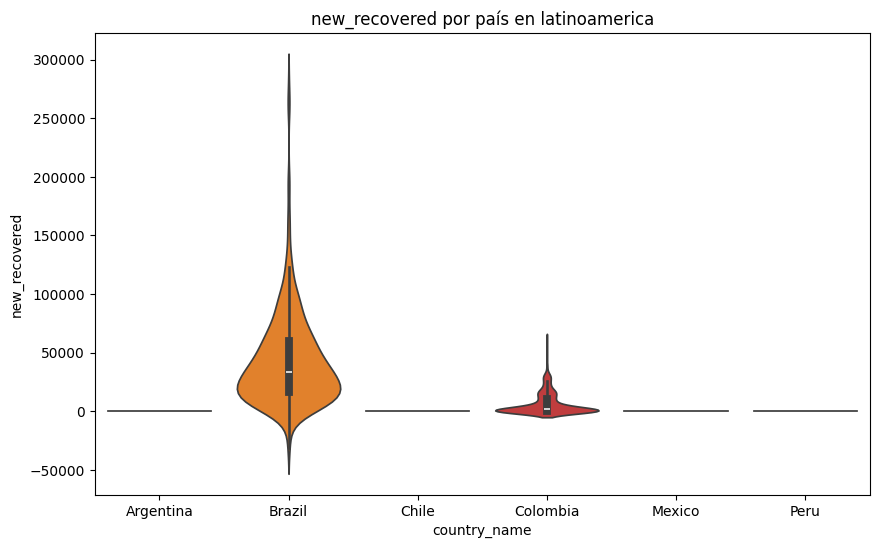

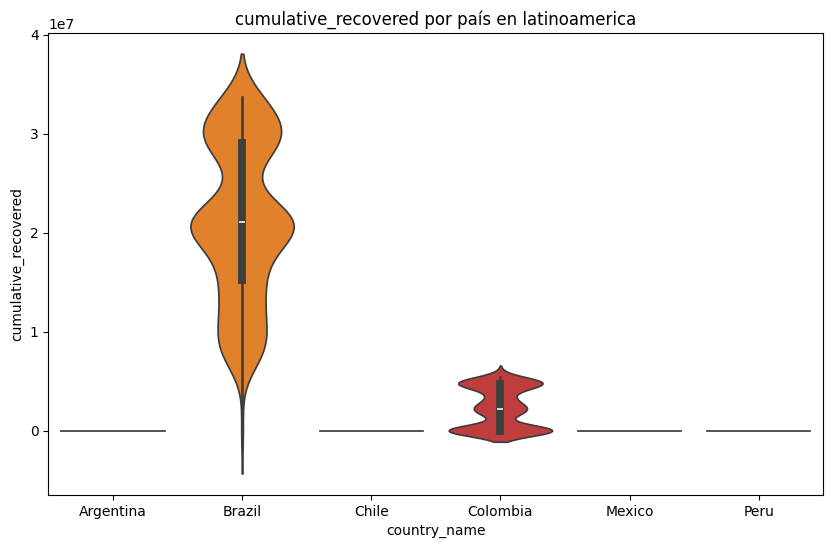

In [24]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)

#agregar a columnas_mayores_6 la columna country_name para poder hacer analisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

# violinplot en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6,hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

In [25]:
# procedamos a analizar la distribución de la población por grupos de edad en los paises seleccionados, 
# para tratar de entender como se comporta la población en cada país y en un futuro poder tomar decisiones más acertadas.

pd.set_option('display.float_format', '{:.2f}'.format)

cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()
age_distribution

population_age_00_09          72354498.00
population_age_10_19          75821668.00
population_age_20_29          75953404.00
population_age_30_39          72153175.00
population_age_40_49          59596656.00
population_age_50_59          47961620.00
population_age_60_69          32654396.00
population_age_70_79          17789478.00
population_age_80_and_older    8711719.00
dtype: float64

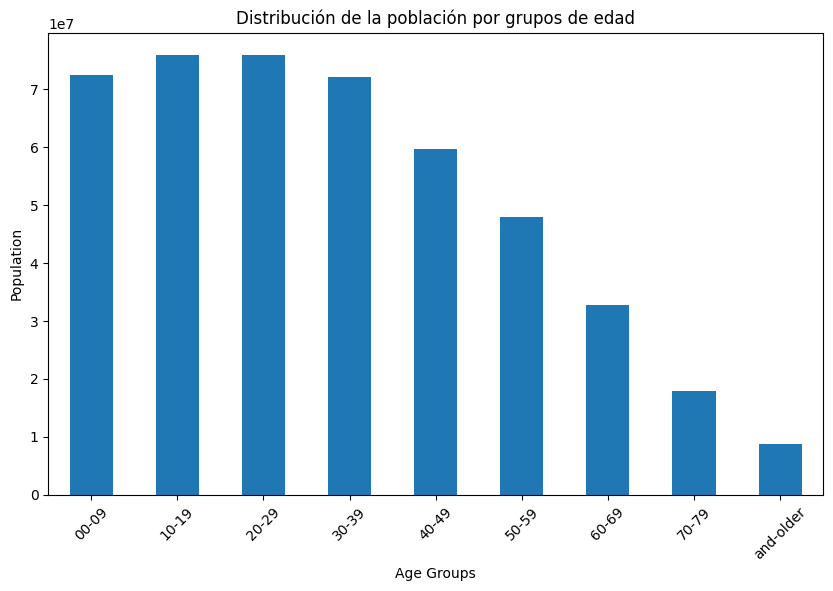

In [26]:
#Calculamos la distribucion de la poblacion por grupos de edad

cut_columns = ['country_name','population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
last_cases = data_latinoamerica_paises[cut_columns].groupby('country_name').last().sort_values(by='population_age_00_09')
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = last_cases[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

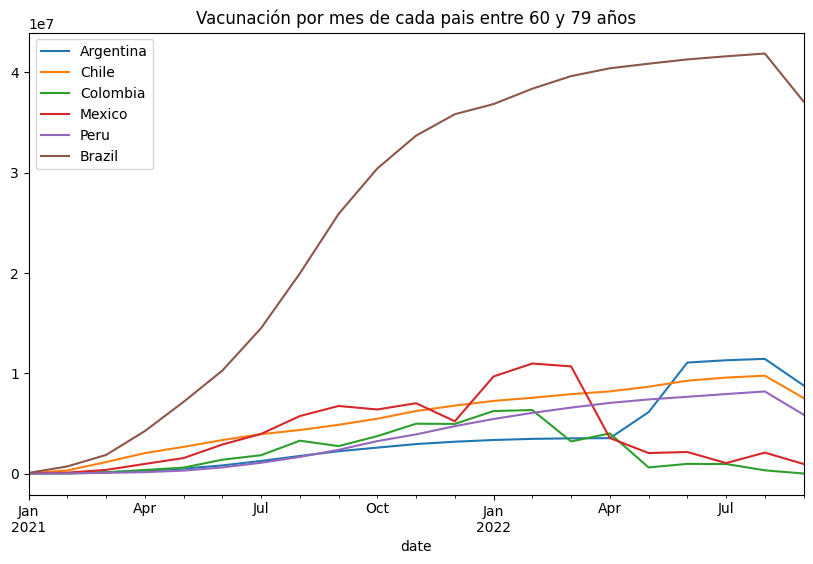

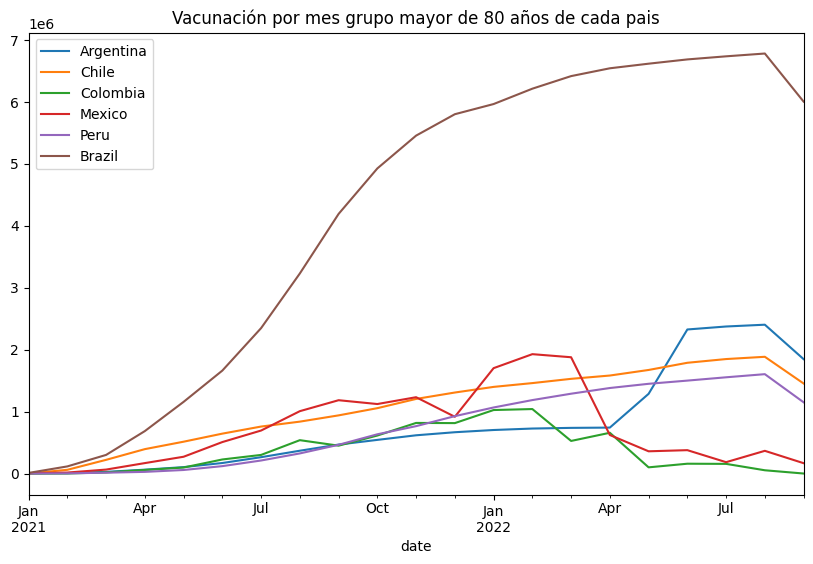

In [27]:
# Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede 
# ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar 
# la cantidad de vacunas por cada grupo etario.

# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

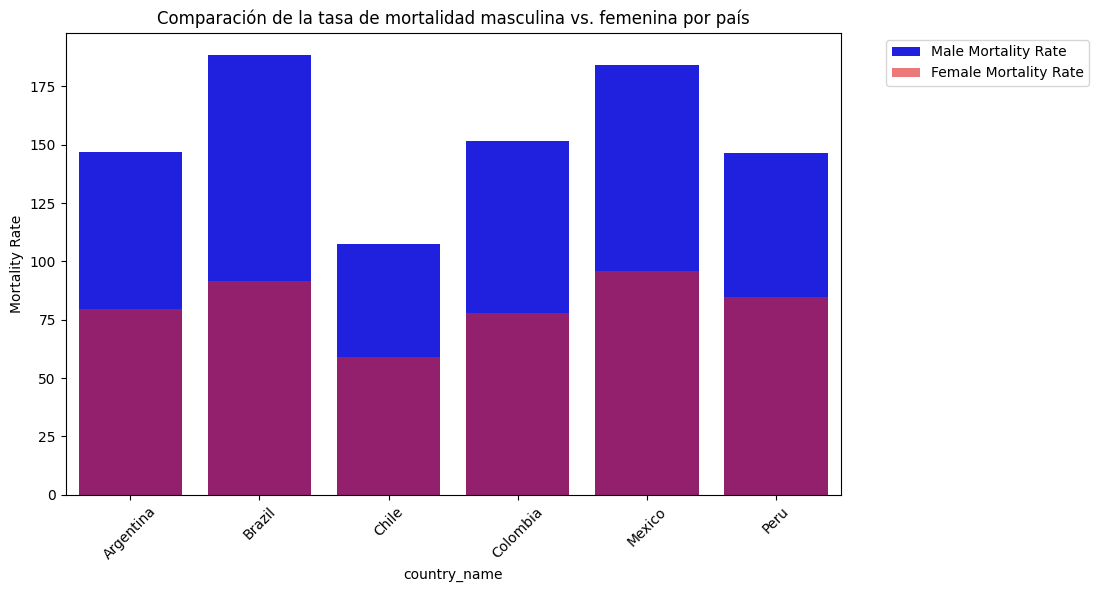

In [28]:
# Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos 
# tener una idea de cuál serían la población a vacunar primero.

# Grafica de mortalidad por genero. Tasa de Mortalidad entendida en Cantidad de muertes cada 1.000.000 de habitantes

plt.figure(figsize=(10, 6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Male Mortality Rate')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

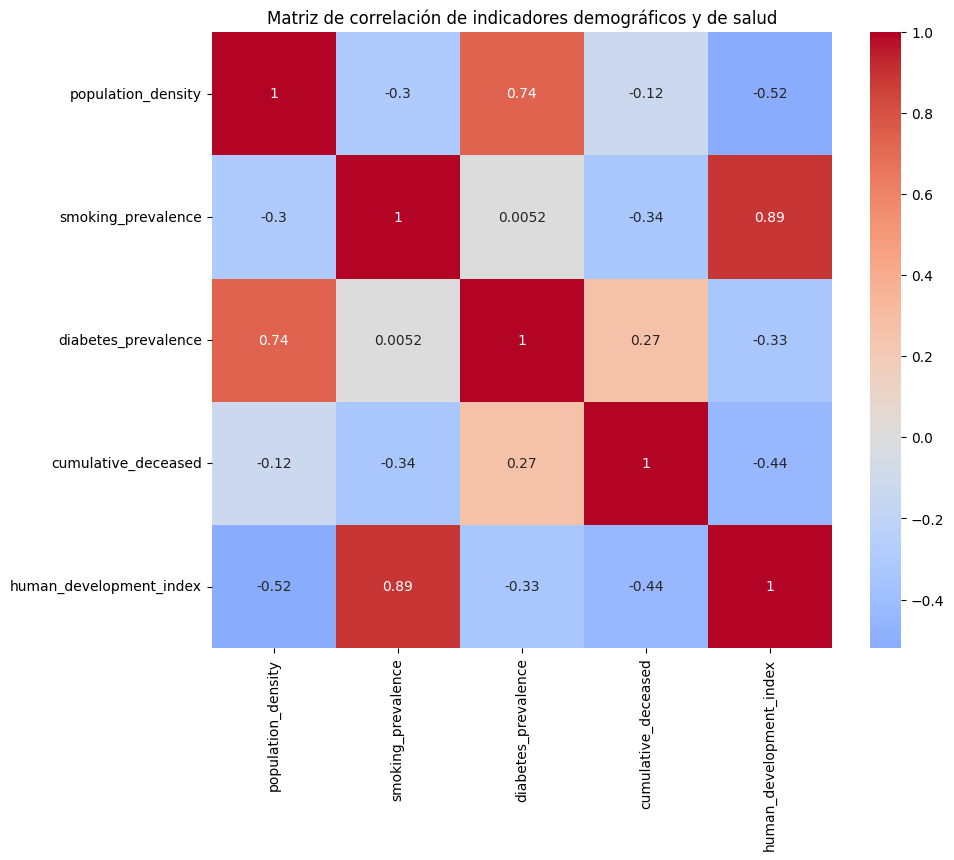

In [29]:
# De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor
# en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad
# o están menos protegidos.Y si vemos las enfermedades preexistentes o comorbilidades? 
# Podríamos ver si hay alguna enfermedad que sea más común en los paises seleccionados y que haya causado más muertes.
# Veamos a ver si existe de una manera mas detallada la variables y la correlación entre ellas.

# Selecciono las variables númericas que quiero correlacionar
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

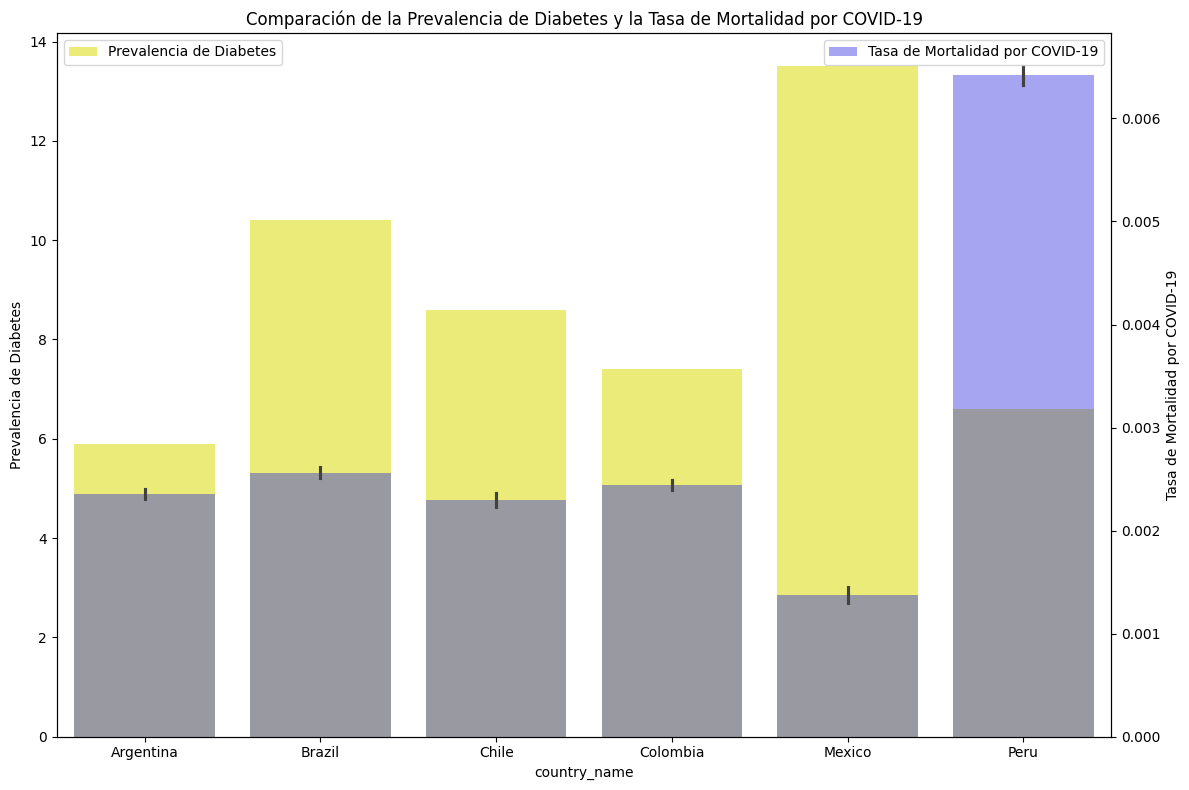

In [30]:
# De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan 
# a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que
#  más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas
#  enfermedades que han causado muertes sino que son las más comúnesDe acuerdo a esto veamos se comporta 
# la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

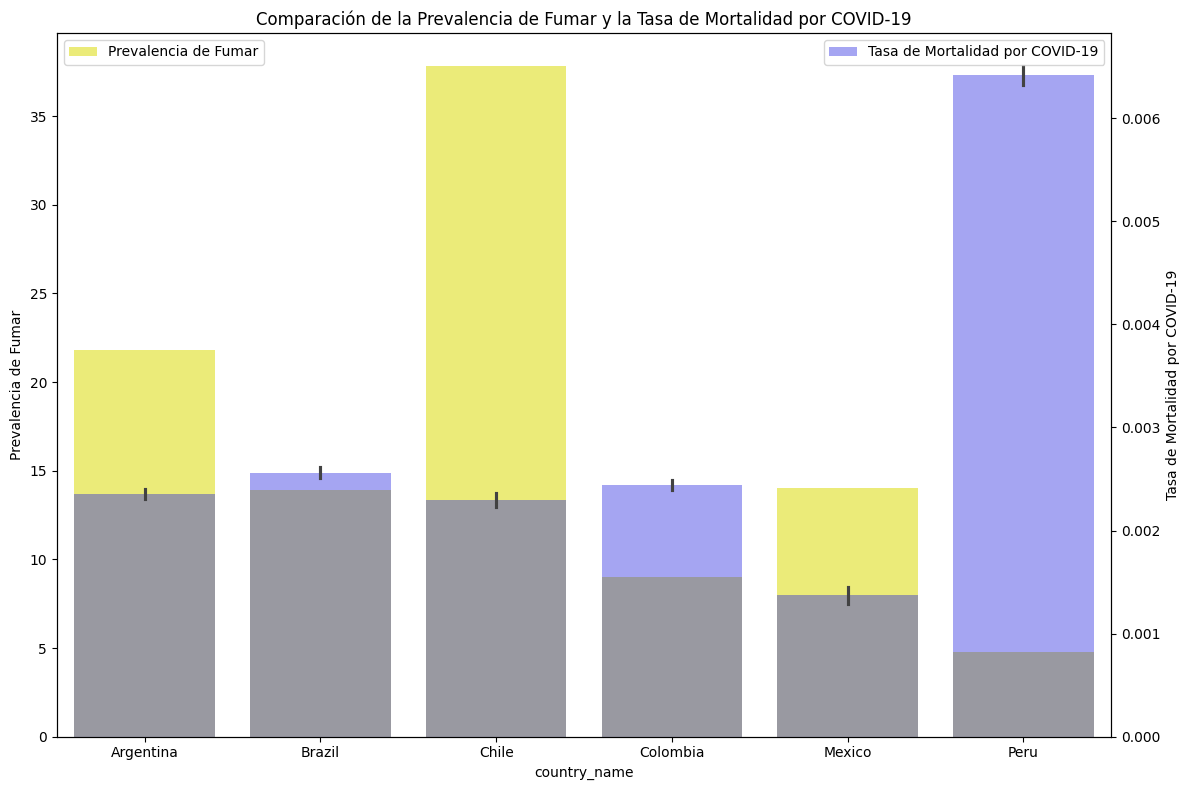

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=data_latinoamerica_paises, 
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], 
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

Las dos enfermedades muestran un comportamiento similar en los paises seleccionados, sin embargo se puede observar que la diabetes es la enfermedad que más ha causado muertes en los paises seleccionados, seguido del fumar.

Como conclusión de este avance podemos decir que los paises que más necesitan ayuda son Brasil, México y Colombia, ya que son los paises que más casos confirmados y muertes han tenido, además de ser los paises que menos vacunas han administrado.

Las enfermedades preexistentes que más han afectado a la población en los paises seleccionados son el fumar y la diabetes, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados (Aclarar que esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes y de las que tenemos datos).

AVANCE 3
EDA con Numpy y Pandas

In [1]:
# Importa las librerías que necesites utilizar en este avance.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# se apagan los warnings para que no salgan durante el análisis
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Cargar el Dataset obtenido en el Avance 1
data_latinoamerica_paises=pd.read_csv("DatosFinalesFiltrado.csv",sep=',')

In [4]:
data_latinoamerica_paises.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 50 columns]

In [5]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [6]:
#poner fechas (date) como índices (index)
data_latinoamerica_paises["date"] = pd.to_datetime(data_latinoamerica_paises["date"])
data_latinoamerica_paises = data_latinoamerica_paises.set_index("date")
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    185.096774          4.765656e+06        124442.124194   
2022-09-15    185.096774          4.765656e+06        124442.124194   
2022-09-16    185.096774          4.765656e+06        124442.124194   
2022-09-17    185.096774          4.765656e+06        124442.124194   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [7]:
#crear columna que se llame week para analizar con números de semanas
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    185.096774          4.765656e+06        124442.124194   
2022-09-15    185.096774          4.765656e+06        124442.124194   
2022-09-16    185.096774          4.765656e+06        124442.124194   
2022-09-17    185.096774          4.765656e+06        124442.124194   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [ ]:
# Como primera aproximación vamos a realizar un análisis del comportamiento de manera semanal y anual, 
# para esto vamos a agrupar los datos por semana y por año. Para que recordemos como usar groupby
# tomo el año 2021 completo 

data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[
    (data_latinoamerica_paises.index >= '2021-01-01') & 
    (data_latinoamerica_paises.index <= '2021-12-31')
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [9]:
#Agrupo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

In [10]:
weekly_cases['country_name'].unique()

array(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'],
      dtype=object)

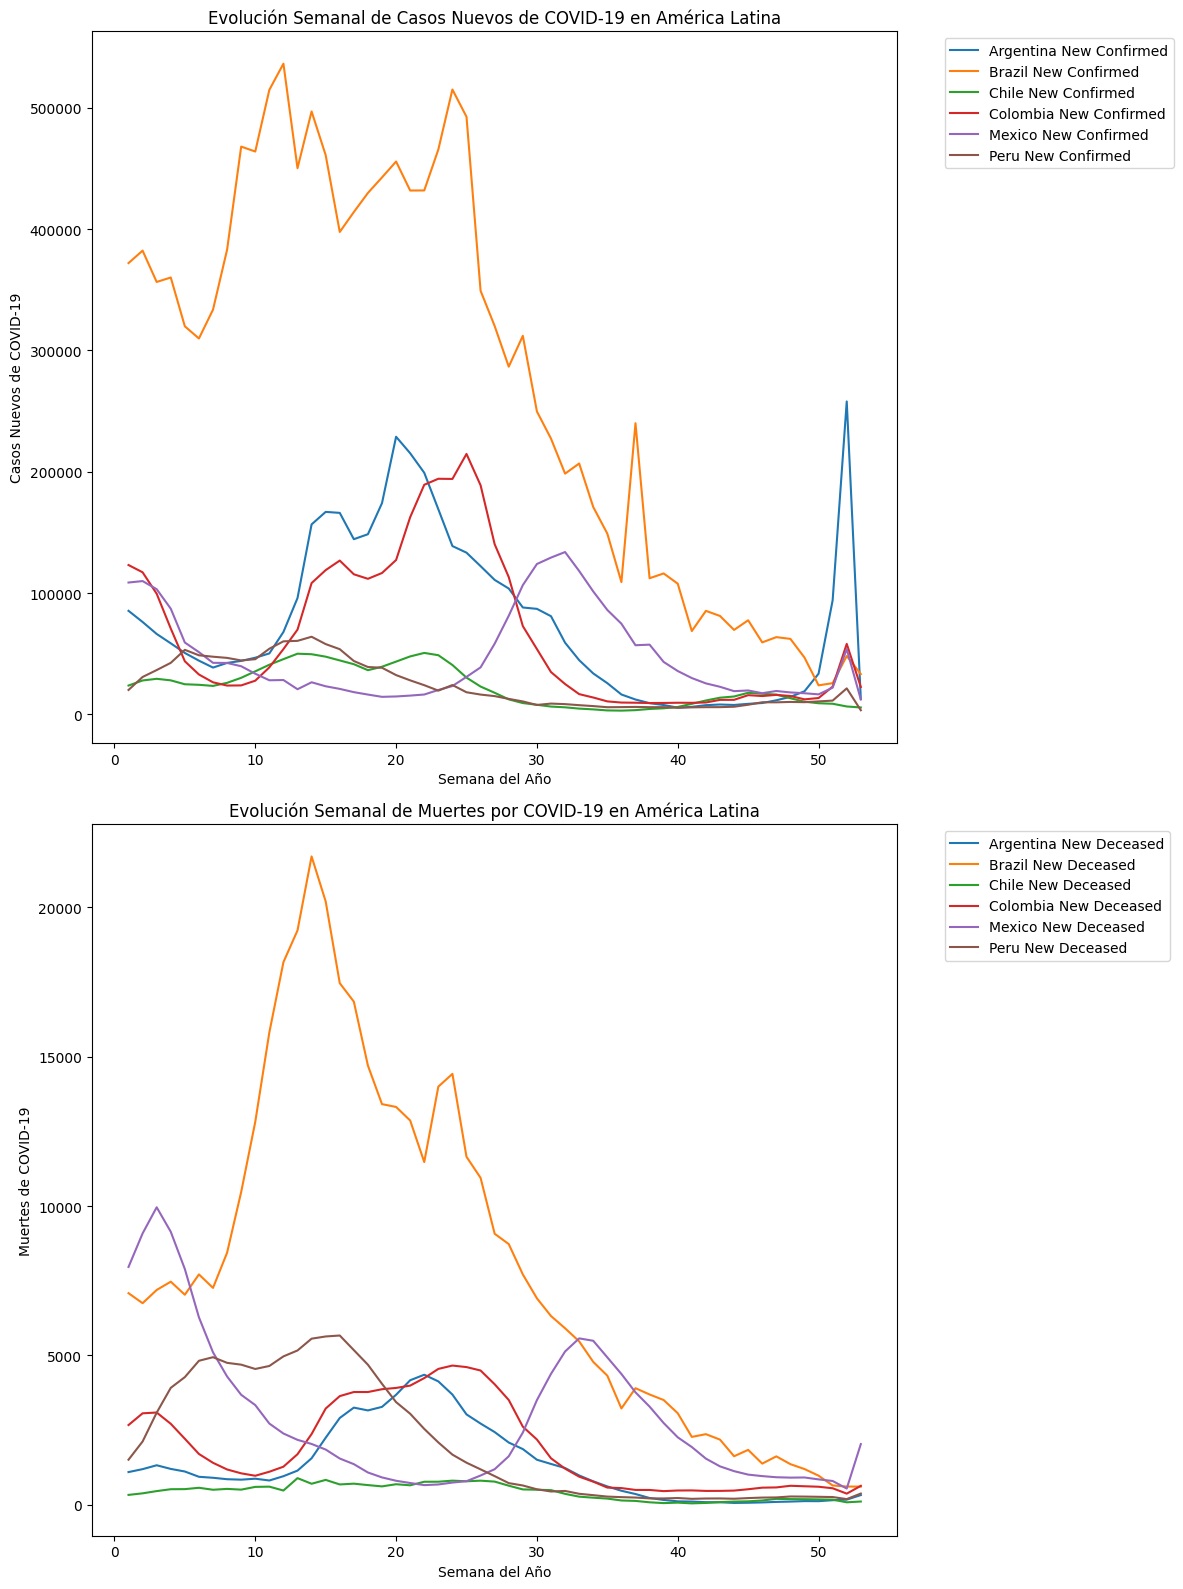

In [11]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Semana del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Semanal de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Semana del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Semanal de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

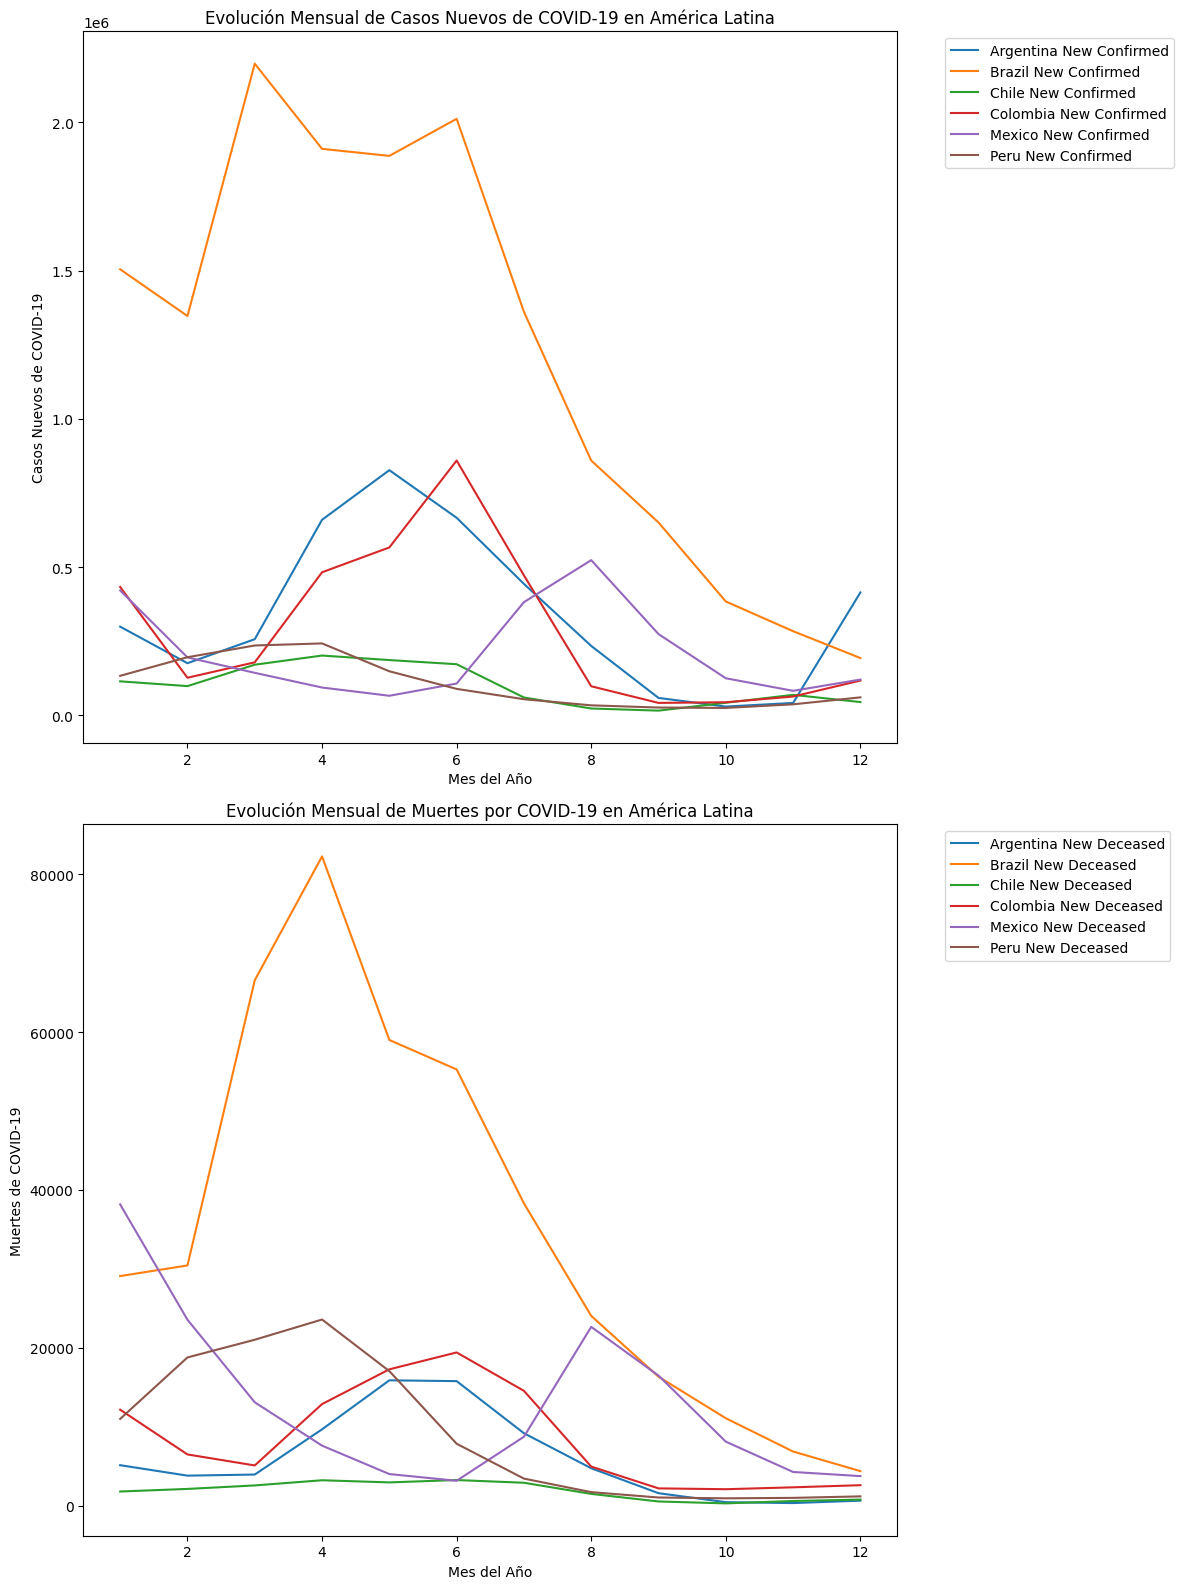

In [12]:
#ahora por vamos a agrupar por mes del añoaño
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month # type: ignore
yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed','new_deceased']].sum().reset_index() # type: ignore

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')

ax[0].set_xlabel("Mes del Año")
ax[0].set_ylabel("Casos Nuevos de COVID-19")
ax[0].set_title("Evolución Mensual de Casos Nuevos de COVID-19 en América Latina")
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel("Mes del Año")
ax[1].set_ylabel("Muertes de COVID-19")
ax[1].set_title("Evolución Mensual de Muertes por COVID-19 en América Latina")
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# De la anterior gráfica se puede observar que la cantidad de casos confirmados y muertes ha ido disminuyendo a lo 
# largo del tiempo, sin embargo esto no quiere decir que la pandemia haya terminado, ya que la cantidad de casos 
# confirmados y muertes sigue siendo alta, ademas se nota un pico en la fechas finales.

# 4. Genera gráficas acordes a tu análisis. Las mismas pueden ser:
# - Evolución de Casos Activos vs. Recuperados
# - Tasa de Crecimiento (%)
# - Relación entre la Cobertura de Vacunación y la Reducción de Casos
# - ('País') Progreso de la vacunación por país
# - Nuevos casos y temperatura promedio
# - Impacto de la Urbanización en la Propagación del Covid-19
#- Evolución Semanal de Casos Nuevos
#- Evolución Anual de Casos Nuevos
#- Distribución de la Población por Edad en Países
#- Comparación de Estrategias de Vacunación en América Latina
#- Evolución del Número de Muertes Diarias.
#- Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
# - Variación Mensual de Casos y Muertes
# - Análisis Temporal de la Mortalidad/
# - Comparación de la Situación Actual (Contexto de los datos)


In [13]:
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    185.096774          4.765656e+06        124442.124194   
2022-09-15    185.096774          4.765656e+06        124442.124194   
2022-09-16    185.096774          4.765656e+06        124442.124194   
2022-09-17    185.096774          4.765656e+06        124442.124194   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

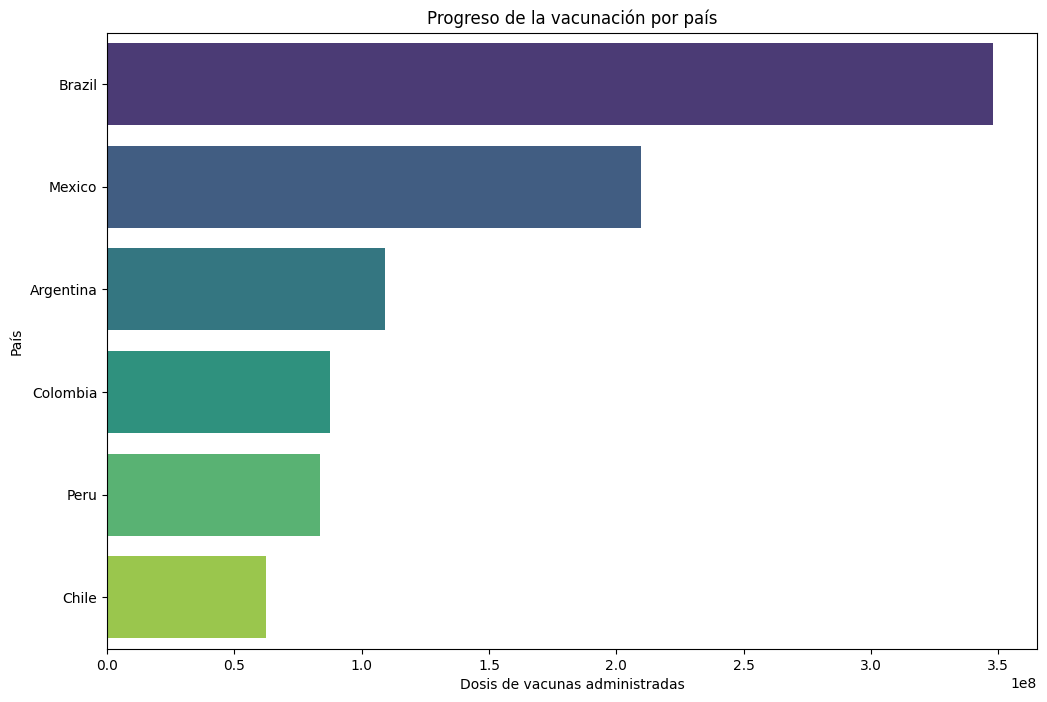

In [14]:
# - Comparación de Estrategias de Vacunación en América Latina
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=vaccination_data.values, y=vaccination_data.index, hue=vaccination_data.index, palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()

In [15]:
# - Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))
ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje ax2 que comparte el mismo eje x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades en el mismo gráfico.
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='New Confirmed Cases')
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature', linestyle='--')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Cada país tiene un impacto debido a la urbanización y la densidad de población, por lo que vamos a analizar la densidad de población en cada país.

In [16]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02  44938712.0        41339571.0          1.670634e+06
2021-01-03  44938712.0        41339571.0          1.675568e+06
2021-01-04  44938712.0        41339571.0          1.689521e+06
2021-01-05  44938712.0        41339571.0          1.703606e+06
2021-01-06  44938712.0        41339571.0          1.718102e+06
...                ...               ...                   ...
2022-09-13  29381884.0        25390339.0          4.127612e+06
2022-09-14  29381884.0        25390339.0          4.765656e+06
2022-09-15  29381884.0        25390339.0          4.765656e+06
2022-09-16  29381884.0        25390339.0          4.765656e+06
2022-09-17  29381884.0        25390339.0          4.765656e+06

[3744 rows x 3 columns]

In [17]:
# -Impacto de la Urbanización en la Propagación del Covid-19
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO    7407.414516    185.096774   
Brazil                 BR           BR    7407.414516    185.096774   
Peru                   PE           PE    7407.414516    185.096774   
Argentina              AR           AR    7407.414516    185.096774   
Mexico                 MX           MX    7407.414516    185.096774   
Chile                  CL           CL    7407.414516    185.096774   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia              4.765656e+06        124442.124194   
Brazil                4.765656e+06        124442.124194   
Peru                  4.765656e+06        124442.124194   
Argentina             4.765656e+06        124442.124194   
Mexico                4.765656e+06        124442.124194   
Chile                 4.765656e+06        124442.124194   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                        0.0   50882884.0   
Brazil                                          0.0  212559409.0   
Peru                                            0.0   29381884.0   
Argentina                                       0.0   44938712.0   
Mexico                                          0.0  110991953.0   
Chile                                           0.0   17574003.0   

              population_male  population_female  ...  life_expectancy  \
country_name                                      ...                    
Colombia           24984564.0         25898320.0  ...           77.109   
Brazil            104435783.0        108123626.0  ...           75.672   
Peru               14450757.0         14931127.0  ...           76.516   
Argentina          19523766.0         20593330.0  ...           76.520   
Mexico             54855231.0         57481307.0  ...           74.992   
Chile               8972014.0          8601989.0  ...           80.042   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                        151.616                       77.999   
Brazil                          188.528                       91.421   
Peru                            146.370                       84.815   
Argentina                       147.086                       79.483   
Mexico                          184.379                       95.815   
Chile                           107.669                       59.035   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                          37.0                        15.8   
Brazil                            29.9                        16.6   
Peru                              63.9                        12.6   
Argentina                         26.6                        15.8   
Mexico                            36.7                        15.7   
Chile                             25.3                        12.4   

              new_recovered  cumulative_recovered  week  \
country_name                                              
Colombia                0.0                   0.0    37   
Brazil                  0.0                   0.0    37   
Peru                    0.0                   0.0    37   
Argentina               0.0                   0.0    37   
Mexico                  0.0                   0.0    37   
Chile                   0.0                   0.0    37   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                         0.802378                         0.

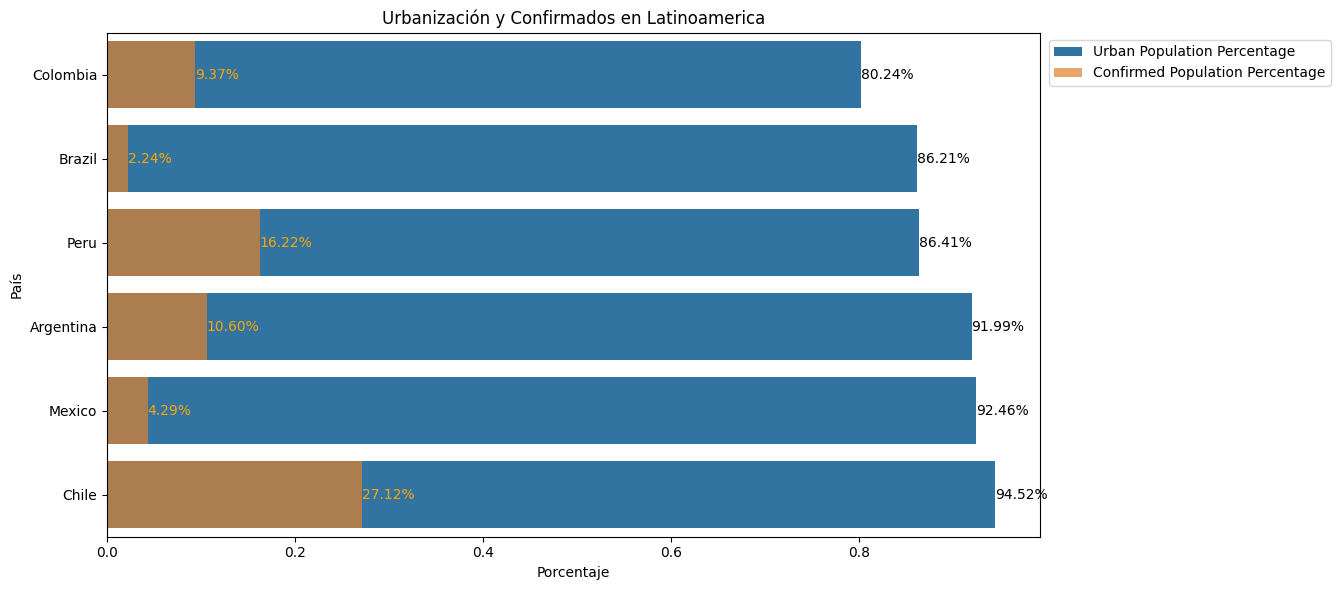

In [18]:
# - Impacto de la Urbanización en la Propagación del Covid-19: Urbanización en Latinoamerica
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')

plt.figure(figsize=(14, 6))
ax = sns.barplot(x='urban_population_percentage', y=urban_cases.index, data=urban_cases, label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):
    ax.text(value, index, f'{value*100:.2f}%', color='black', ha="left", va="center")

# Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(x='confirmed_population_percentage', y=urban_cases.index, data=urban_cases, alpha=0.7, label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para confirmed_population_percentage
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value, index, f'{value*100:.2f}%', color='orange', ha="left", va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()


In [ ]:
# Densidad de población por grupo de edad
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru    7407.414516   
2022-09-15           PE           PE         Peru    7407.414516   
2022-09-16           PE           PE         Peru    7407.414516   
2022-09-17           PE           PE         Peru    7407.414516   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    185.096774          4.765656e+06        124442.124194   
2022-09-15    185.096774          4.765656e+06        124442.124194   
2022-09-16    185.096774          4.765656e+06        124442.124194   
2022-09-17    185.096774          4.765656e+06        124442.124194   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2022-09-13                                    0.0  29381884.0   
2022-09-14                                    0.0  29381884.0   
2022-09-15                                    0.0  29381884.0   
2022-09-16                                    0.0  29381884.0   
2022-09-17                                    0.0  29381884.0   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02       19523766.0  ...                    147.086   
2021-01-03       19523766.0  ...                    147.086   
2021-01-04       19523766.0  ...                    147.086   
2021-01-05       19523766.0  ...                    147.086   
2021-01-06       19523766.0  ...                    147.086   
...                     ...  ...                        ...   
2022-09-13       14450757.0  ...                    146.370   
2022-09-14       14450757.0  ...                    146.370   
2022-09-15       14450757.0  ...                    146.370   
2022-09-16       14450757.0  ...                    146.370   
2022-09-17       14450757.0  ...                    146.370   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   
...                                 ...              

In [22]:
# Ordenar lo anterior por pais
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [21]:
#ver columnas para conocer columnas que tienen grupos etáreos
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [23]:
# tomo las columnas de los grupos etáreos para verlas
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02             6718871.0             7045513.0             6430658.0   
2021-01-03             6718871.0             7045513.0             6430658.0   
2021-01-04             6718871.0             7045513.0             6430658.0   
2021-01-05             6718871.0             7045513.0             6430658.0   
2021-01-06             6718871.0             7045513.0             6430658.0   
...                          ...                   ...                   ...   
2022-09-13             5140624.0             5035905.0             4895056.0   
2022-09-14             5140624.0             5035905.0             4895056.0   
2022-09-15             5140624.0             5035905.0             4895056.0   
2022-09-16             5140624.0             5035905.0             4895056.0   
2022-09-17             5140624.0             5035905.0             4895056.0   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02             5777148.0             4507125.0             3911943.0   
2021-01-03             5777148.0             4507125.0             3911943.0   
2021-01-04             5777148.0             4507125.0             3911943.0   
2021-01-05             5777148.0             4507125.0             3911943.0   
2021-01-06             5777148.0             4507125.0             3911943.0   
...                          ...                   ...                   ...   
2022-09-13             4379777.0             3660378.0             2772568.0   
2022-09-14             4379777.0             3660378.0             2772568.0   
2022-09-15             4379777.0             3660378.0             2772568.0   
2022-09-16             4379777.0             3660378.0             2772568.0   
2022-09-17             4379777.0             3660378.0             2772568.0   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02             2914251.0             1817557.0   
2021-01-03             2914251.0             1817557.0   
2021-01-04             2914251.0             1817557.0   
2021-01-05             2914251.0             1817557.0   
2021-01-06             2914251.0             1817557.0   
...                          ...                   ...   
2022-09-13             1846407.0             1078066.0   
2022-09-14             1846407.0             1078066.0   
2022-09-15             1846407.0             1078066.0   
2022-09-16             1846407.0             1078066.0   
2022-09-17             1846407.0             1078066.0   

            population_age_80_and_older  
date                                     
2021-01-02                     994030.0  
2021-01-03                     994030.0  
2021-01-04                     994030.0  
2021-01-05                     994030.0  
2021-01-06                     994030.0  
...                                 ...  
2022-09-13                     573103.0  
2022-09-14                     573103.0  
2022-09-15                     573103.0  
2022-09-16                     573103.0  
2022-09-17                     573103.0  

[3744 rows x 9 columns]

In [24]:
# traer datos de los promedios de edad en los países con mayor mortalidad que ya fueron observados en punto anterior
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina                6718871.0             7045513.0   
Brazil                  29076910.0            31160446.0   
Chile                    2428079.0             2493879.0   
Colombia                 7414155.0             8119876.0   
Peru                     5140624.0             5035905.0   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina                6430658.0             5777148.0   
Brazil                  34104643.0            34476762.0   
Chile                    2995538.0             2945404.0   
Colombia                 8847061.0             7810299.0   
Peru                     4895056.0             4379777.0   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina                4507125.0             3911943.0   
Brazil                  29462006.0            24421202.0   
Chile                    2578404.0             2352271.0   
Colombia                 6450787.0             5543980.0   
Peru                     3660378.0             2772568.0   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina                2914251.0             1817557.0   
Brazil                  16896862.0             8801551.0   
Chile                    1791787.0              993126.0   
Colombia                 3771358.0             1979761.0   
Peru                     1846407.0             1078066.0   

              population_age_80_and_older  
country_name                               
Argentina                        994030.0  
Brazil                          4159027.0  
Chile                            537721.0  
Colombia                         945607.0  
Peru                             573103.0

In [25]:
age_distribution.index.unique()

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

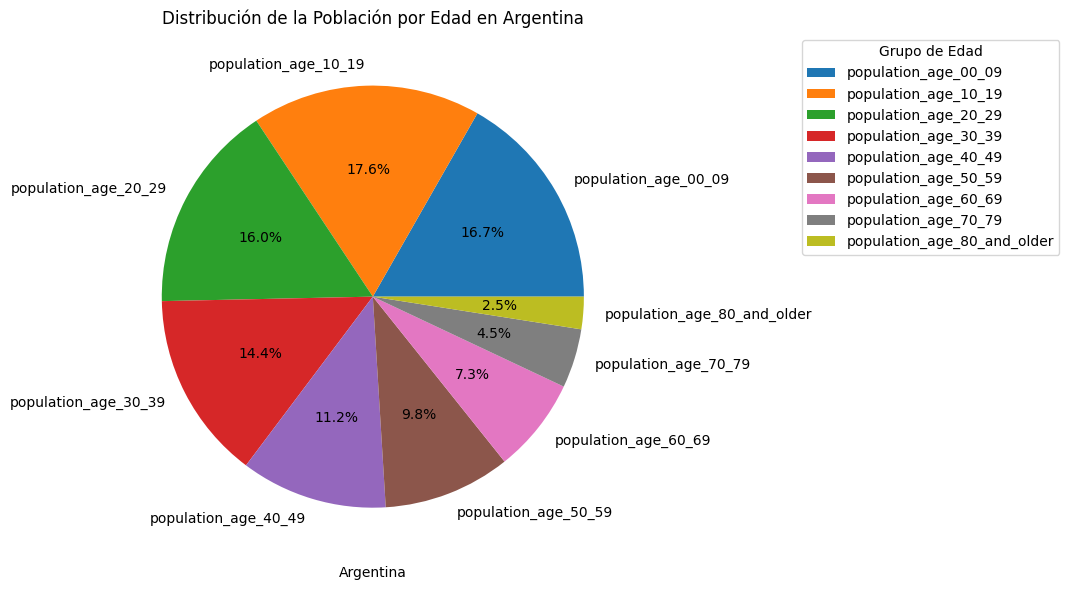

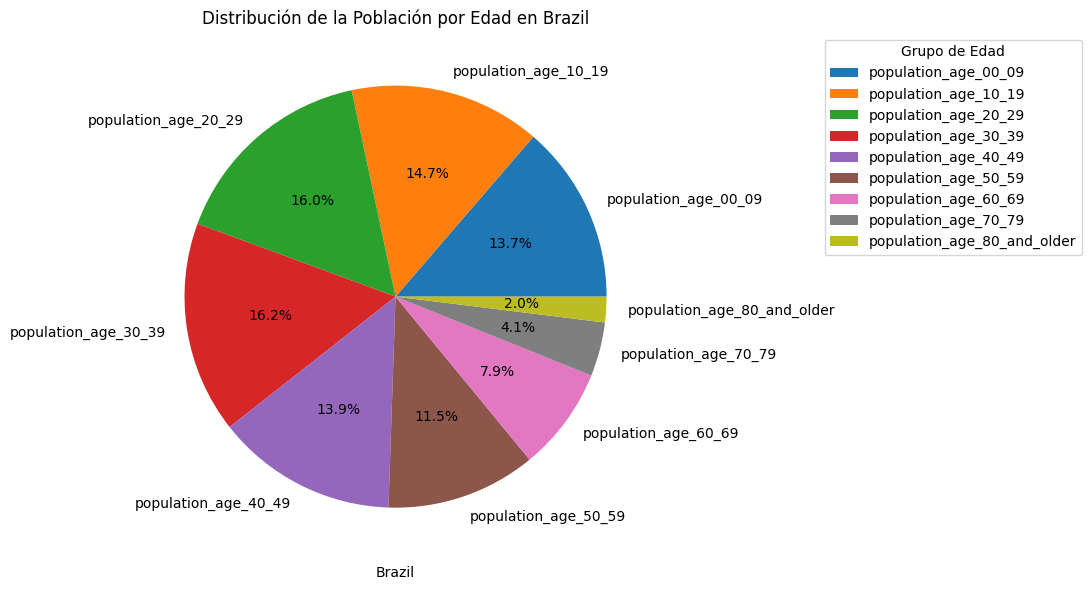

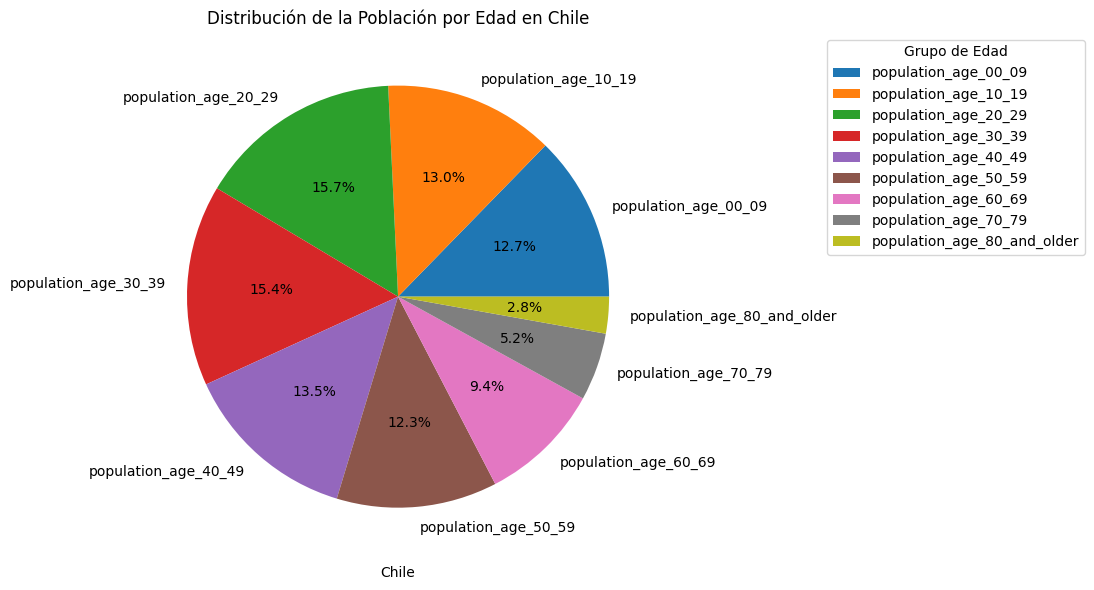

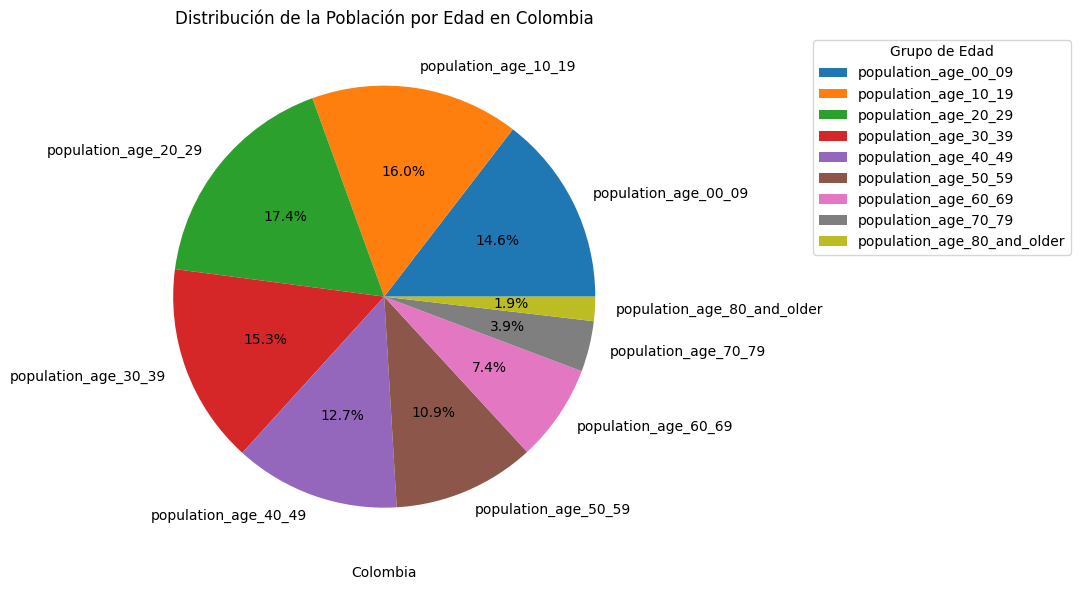

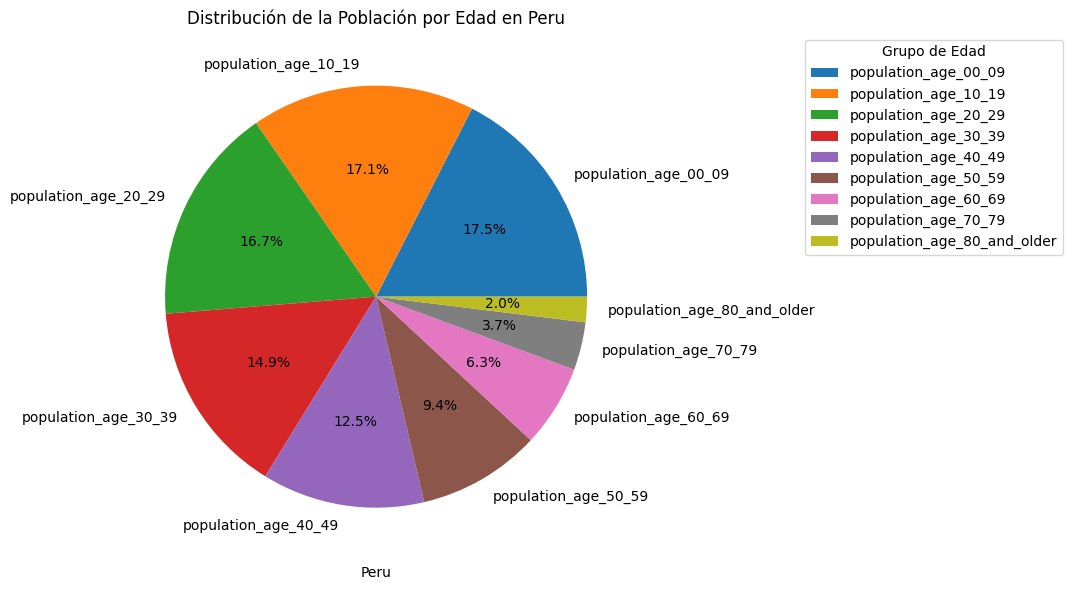

In [26]:
# Densidad de población por grupos de edad
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
paises = age_distribution.index.unique()

for pais in paises:
    plt.figure(figsize=(12,6))
    plt.pie(
        age_distribution.loc[pais].values,
        labels=age_distribution.loc[pais].index,
        autopct='%1.1f%%'
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

In [27]:
#- Comparación de estrategias de vacunación
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina    109204825.0
Brazil       347868481.0
Chile         62204235.0
Colombia      87566541.0
Mexico       209673612.0
Peru          83624934.0
Name: cumulative_vaccine_doses_administered, dtype: float64

In [28]:
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina     44938712.0
Brazil       212559409.0
Chile         17574003.0
Colombia      50882884.0
Mexico       110991953.0
Peru          29381884.0
Name: population, dtype: float64

In [29]:
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    2.430084
Brazil       1.636571
Chile        3.539560
Colombia     1.720943
Mexico       1.889088
Peru         2.846139
dtype: float64

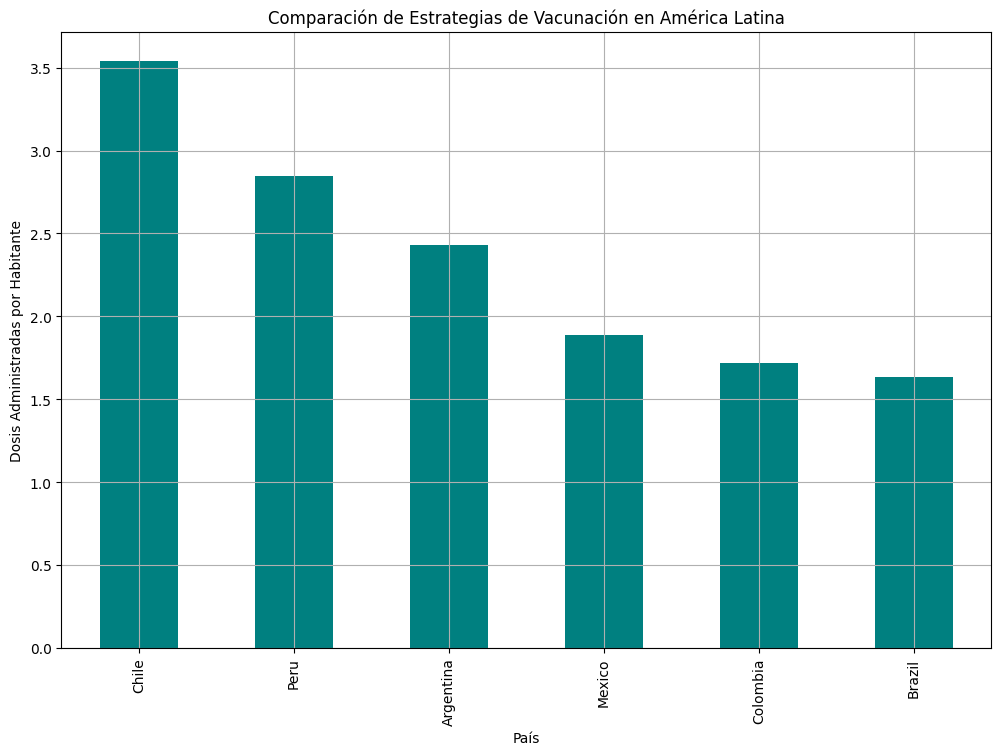

In [30]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)

plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

In [31]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [32]:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

In [33]:
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

In [34]:
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru         0.007357
Chile        0.007081
Brazil       0.003224
Colombia     0.003061
Argentina    0.002889
Mexico       0.002739
Name: deceased_percentage, dtype: float64

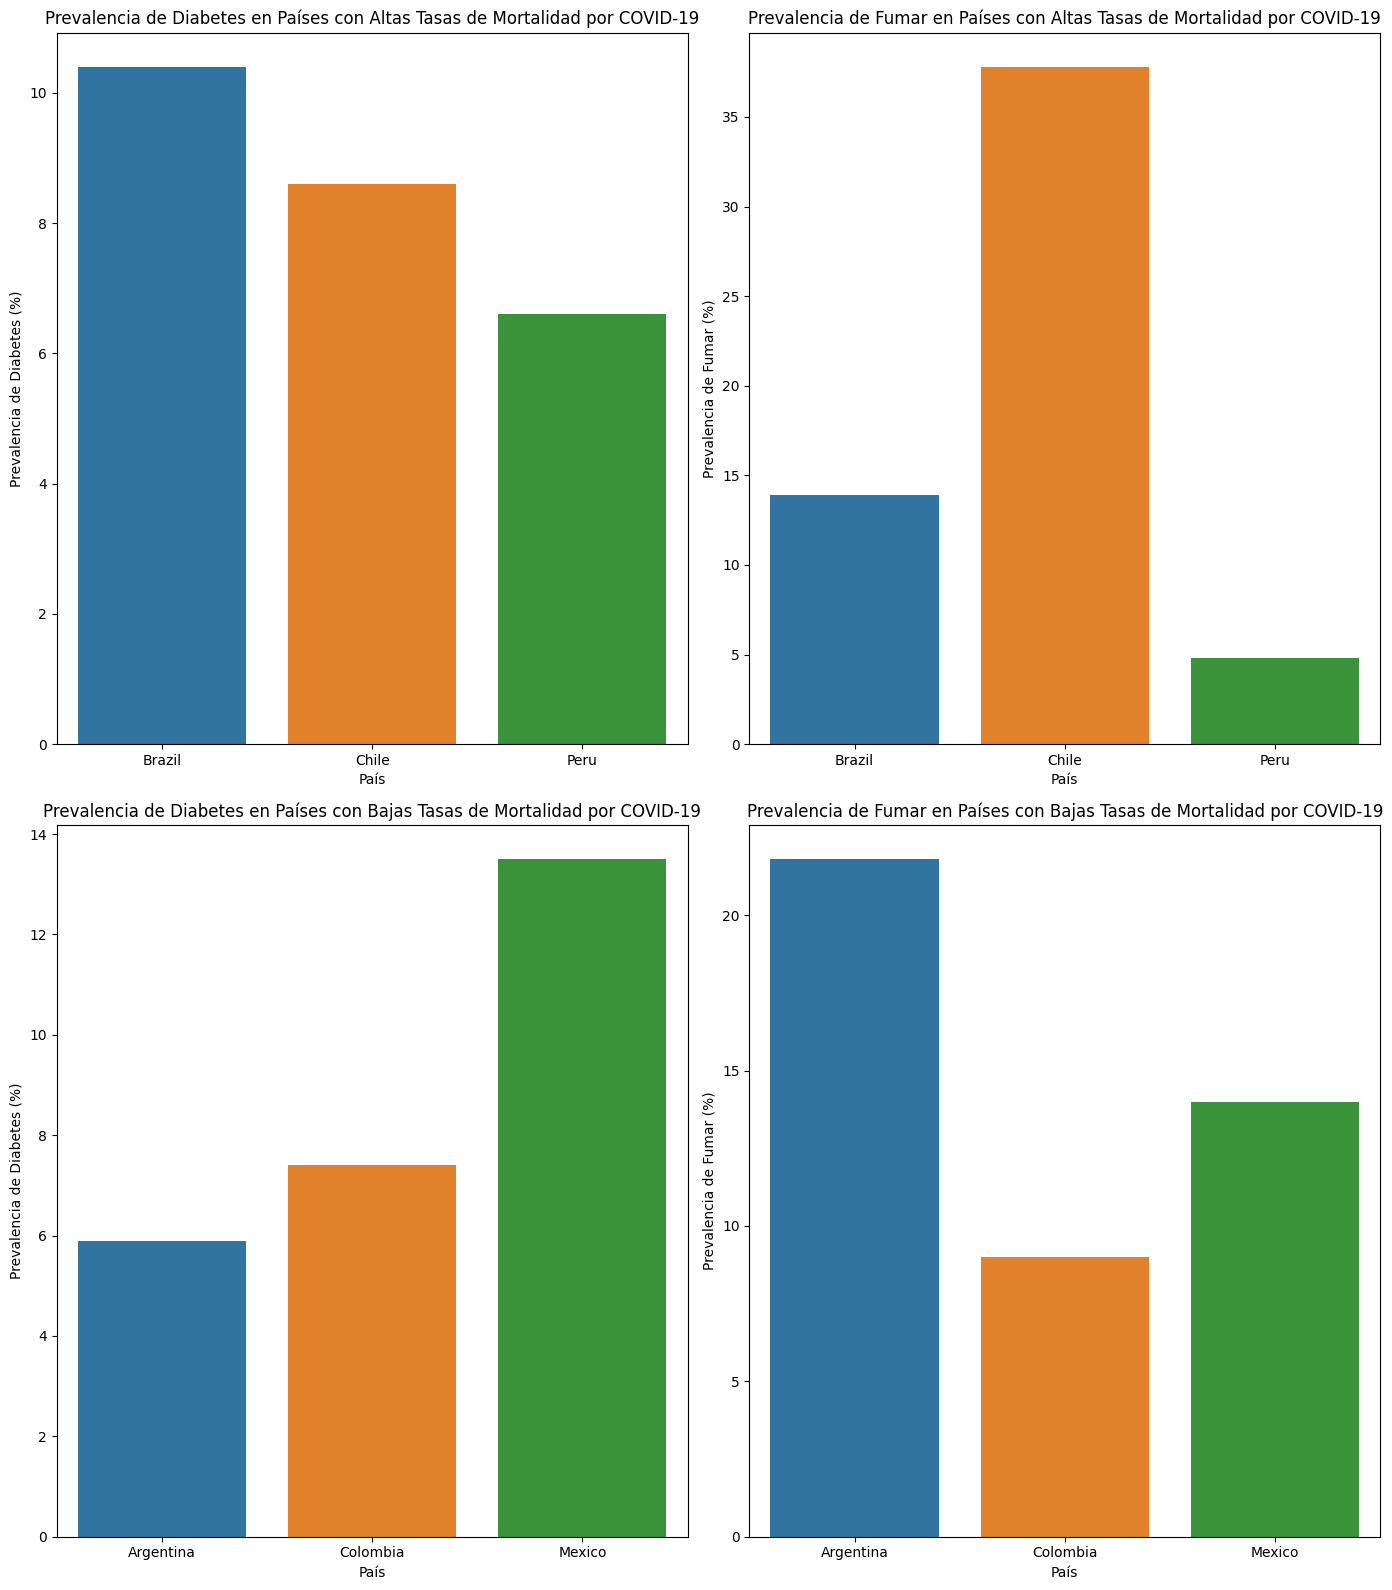

In [35]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.

top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)

# Prevalencia de diabetes en top
sns.barplot(data=conditions_top_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax1)
ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_top_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax2)
ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='diabetes_prevalence', hue='country_name', ax=ax3)
ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(data=conditions_bottom_data, x='country_name', y='smoking_prevalence', hue='country_name', ax=ax4)
ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

In [36]:
# - Fatalidad por país
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Argentina    0.026112
Brazil       0.026112
Chile        0.026112
Colombia     0.026112
Mexico       0.026112
Peru         0.026112
Name: case_fatality_rate, dtype: float64

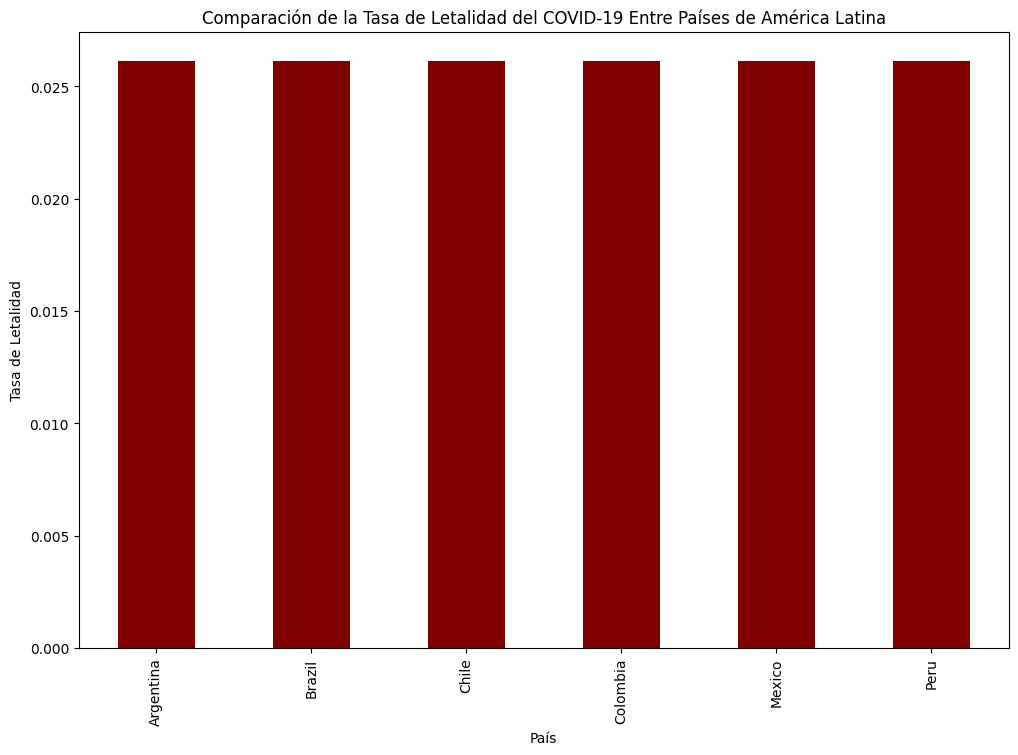

In [37]:
#  Fatalidad por pais

data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()

plt.figure(figsize=(12, 8))
fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

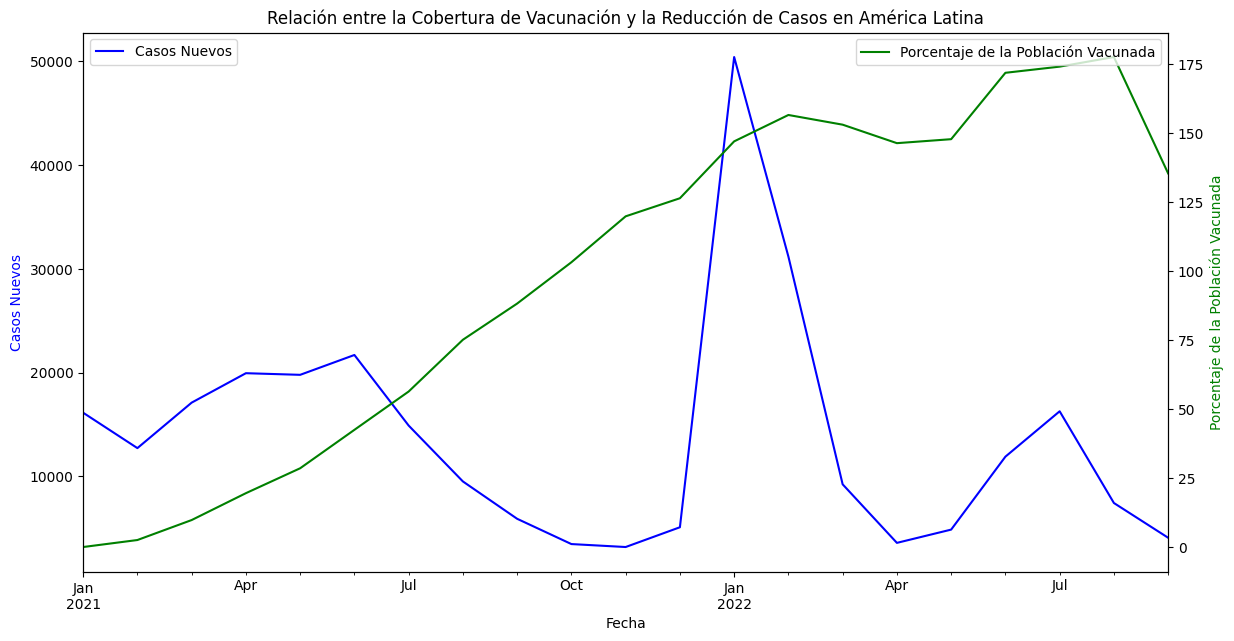

In [38]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#crea percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [39]:
# cómo evolucionó la mortalidad

data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_latinoamerica_paises, 
    x='date', 
    y='mortality_rate', 
    estimator='mean'
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

In [40]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

In [46]:
#La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina     4.641214e+06                   0.0        124442.124194
Brazil        4.641214e+06                   0.0        124442.124194
Chile         4.641214e+06                   0.0        124442.124194
Colombia      4.641214e+06                   0.0        124442.124194
Mexico        4.641214e+06                   0.0        124442.124194
Peru          4.641214e+06                   0.0        124442.124194

In [45]:
# Debo usar max() porque last no registra el acumulado de recovered
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile         4.641214e+06                   0.0        124442.124194
Mexico        4.641214e+06                   0.0        304025.000000
Peru          4.641214e+06                   0.0        216173.000000
Colombia      6.162609e+06             5441021.0        155770.000000
Argentina     9.567933e+06                   0.0        129830.000000
Brazil        3.381931e+07            33706231.0        685203.000000

In [43]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())
]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina  4.641214e+06                   0.0   
2022-09-17       Brazil  4.641214e+06                   0.0   
2022-09-17        Chile  4.641214e+06                   0.0   
2022-09-17     Colombia  4.641214e+06                   0.0   
2022-09-17       Mexico  4.641214e+06                   0.0   
2022-09-17         Peru  4.641214e+06                   0.0   

            cumulative_deceased  
date                             
2022-09-17        124442.124194  
2022-09-17        124442.124194  
2022-09-17        124442.124194  
2022-09-17        124442.124194  
2022-09-17        124442.124194  
2022-09-17        124442.124194

In [44]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()